In [1]:
import sys
print(sys.version)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
"""
Created on January 29 2019
@author: Neven Caplar
@contact: ncaplar@princeton.edu
@web: www.ncaplar.com
"""

'\nCreated on January 29 2019\n@author: Neven Caplar\n@contact: ncaplar@princeton.edu\n@web: www.ncaplar.com\n'

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [106]:
import numpy as np
np.set_printoptions(suppress=True)
np.seterr(divide='ignore', invalid='ignore')

# astropy
from astropy.io import *
from astropy.io import fits

import pickle

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline

# Repeating analysis from August 20, 2018

## First, deduce which spot is the brightest on the whole detector 

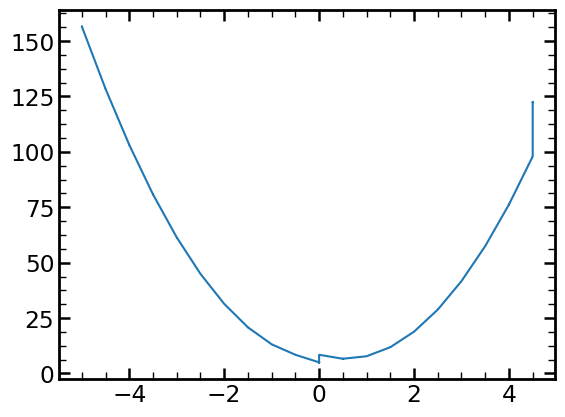

In [519]:
from astropy.io import *

res=[]
for i in range(8546,8635+1):
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15/v000'+str(i)+'/PFLAr1.fits')
    res.append([i,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME']])

    
res=np.array(res)
res_exposure_times=res

plt.plot(res[:,1],res[:,2])

In [520]:
from astropy.io import *

res=[]
for i in range(8637,8708+1):
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(i)+'/PFLAr1.fits')
    res.append([hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME']])

    
res=np.array(res)

In [521]:
# which one is the brightest
obs=8600
res=[]
for image_index in [5,15,25,35,45,55,65,75,85,95]:
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/TigerAnalysis/CutsForTigerAug15/sci"+str(obs)+str(image_index)+'Stacked_Cleaned_Dithered.npy')
    res.append([image_index,np.sum(sci_image)])
    
res=np.array(res)

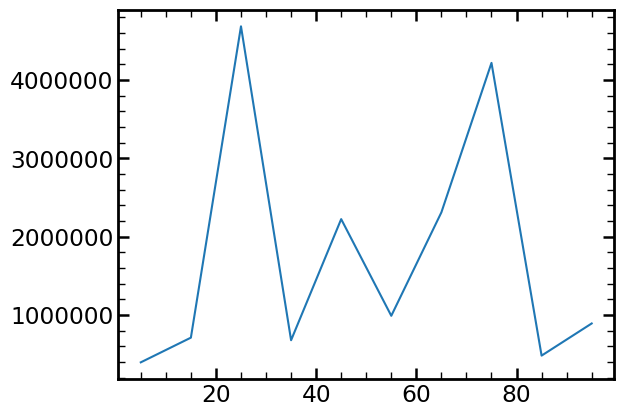

In [522]:
plt.plot(res[:,0],res[:,1])

In [523]:
# which one is the brightest
obs=8600
res=[]
for image_index in [50,51,52,53,54,55,55,57,58,59]:
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/TigerAnalysis/CutsForTigerAug15/sci"+str(obs)+str(image_index)+'Stacked_Cleaned_Dithered.npy')
    res.append([image_index,np.sum(sci_image)])
    
res=np.array(res)

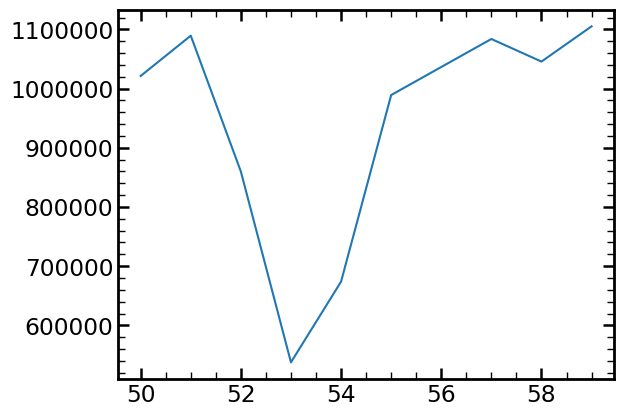

In [524]:
plt.plot(res[:,0],res[:,1])

## Interpolate to get the result 

In [525]:
#take images without stacking!!!!
res=[]
for obs in range(8549,8633,3):
    sci_image=np.load('/Users/nevencaplar/Documents/PFS/2017-12-15/Stamps/sci'+str(obs)+'25.npy')
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])
    
res=np.array(res)
res_flux=res

In [526]:
res_flux

array([[ 8549.        ,    -4.50003   ,   128.459     , 17383.35742188],
       [ 8552.        ,    -4.00001   ,   103.177     , 12640.74902344],
       [ 8555.        ,    -3.50001   ,    80.828     , 13089.54785156],
       [ 8558.        ,    -3.        ,    61.426     , 12503.11132812],
       [ 8561.        ,    -2.5       ,    44.952     , 13214.87792969],
       [ 8564.        ,    -2.        ,    31.423     , 13570.40722656],
       [ 8567.        ,    -1.50001   ,    20.817     , 14268.42578125],
       [ 8570.        ,    -0.99999   ,    13.147     , 16692.67578125],
       [ 8573.        ,    -0.50001   ,     8.42      , 26595.54882812],
       [ 8576.        ,     0.        ,     5.013     , 31475.79296875],
       [ 8579.        ,     0.00001   ,     5.013     , 31973.62890625],
       [ 8582.        ,     0.        ,     5.013     , 31429.88671875],
       [ 8585.        ,    -0.00001   ,     5.013     , 31366.59765625],
       [ 8588.        ,    -0.00001   ,     5.013  

In [527]:
# total time 
np.sum(res_flux[:,2]*3)/3600

0.7444774999999999

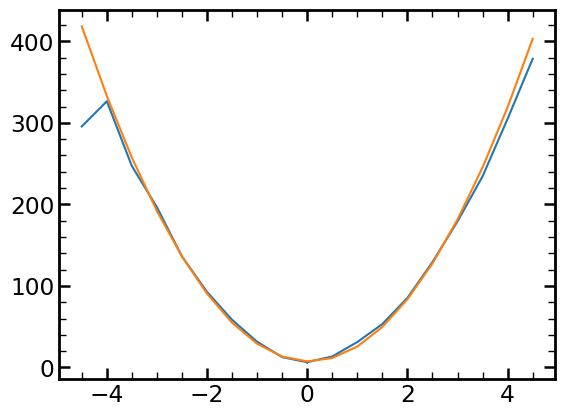

In [528]:
p4=np.poly1d(np.polyfit(np.round(res_flux[:,1][1:],1),(40000/res_flux[:,3][1:])*res_flux[:,2][1:],2,w=-20+np.sqrt((40000/res_flux[:,3][1:])*res_flux[:,2][1:])))

plt.plot(np.round(res_flux[:,1],1),(40000/res_flux[:,3])*res_flux[:,2])
plt.plot(np.round(res_flux[:,1],1),p4(np.round(res_flux[:,1],1)))

In [529]:
res_HgAr_exposures=[]
for i in np.unique(np.round(res_flux[:,1][0:],1)):
    res_HgAr_exposures.append([i,p4(i)])
    
res_HgAr_exposures=np.array(res_HgAr_exposures)

In [530]:
res_HgAr_exposures

array([[ -4.5       , 418.38337698],
       [ -4.        , 332.89307088],
       [ -3.5       , 257.36018717],
       [ -3.        , 191.78472584],
       [ -2.5       , 136.1666869 ],
       [ -2.        ,  90.50607034],
       [ -1.5       ,  54.80287617],
       [ -1.        ,  29.05710438],
       [ -0.5       ,  13.26875498],
       [  0.        ,   7.43782797],
       [  0.5       ,  11.56432334],
       [  1.        ,  25.6482411 ],
       [  1.5       ,  49.68958124],
       [  2.        ,  83.68834377],
       [  2.5       , 127.64452868],
       [  3.        , 181.55813598],
       [  3.5       , 245.42916567],
       [  4.        , 319.25761774],
       [  4.5       , 403.0434922 ]])

In [531]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures[:,0][0+i])+res_HgAr_exposures[:,0][-1-i])/2,np.round((res_HgAr_exposures[:,1][0+i]+res_HgAr_exposures[:,1][-1-i])/2)])
    
res_HgAr_exposures_round=np.array(res)

In [532]:
res_HgAr_exposures_round

array([[  4.5, 411. ],
       [  4. , 326. ],
       [  3.5, 251. ],
       [  3. , 187. ],
       [  2.5, 132. ],
       [  2. ,  87. ],
       [  1.5,  52. ],
       [  1. ,  27. ],
       [  0.5,  12. ],
       [  0. ,   7. ]])

## summing all together 

In [42]:
res_HgAr_exposures_round[:,1]=res_HgAr_exposures_round[:,1]
res_HgAr_exposures_round[:,1]

array([411., 326., 251., 187., 132.,  87.,  52.,  27.,  12.,   7.])

In [43]:
res_HgAr_exposures_round_with_overhead=np.copy(res_HgAr_exposures_round)
res_HgAr_exposures_round_with_overhead[:,1]=res_HgAr_exposures_round_with_overhead[:,1]+40

In [ ]:
Dithered_HgAr=(res_HgAr_exposures_round[:,1][-1]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(6*4)+2*res_HgAr_exposures_round[:,1][-3]*(6*4))
Dithered_HgAr/3600

In [ ]:
Dithered_HgAr_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-1]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(6*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-3]*(6*4))
Dithered_HgAr_with_overhead/3600

In [ ]:
NoDithered_HgAr=(res_HgAr_exposures_round[:,1][-4]*3*2+res_HgAr_exposures_round[:,1][-5]*3*2+
            res_HgAr_exposures_round[:,1][-6]*3*2+res_HgAr_exposures_round[:,1][-7]*3*2+res_HgAr_exposures_round[:,1][-8]*3*2+res_HgAr_exposures_round[:,1][-9]*3*2)
NoDithered_HgAr/3600

In [ ]:
NoDithered_HgAr_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-4]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-5]*3*2+
            res_HgAr_exposures_round_with_overhead[:,1][-6]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-7]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-8]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-9]*3*2)
NoDithered_HgAr_with_overhead/3600

In [ ]:
Dithered=(res_HgAr_exposures_round[:,1][-1]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(30*4))
Dithered/3600

In [ ]:
Dithered_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-1]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(30*4))
Dithered_with_overhead/3600

In [ ]:
(Dithered_HgAr+NoDithered_HgAr)/3600

In [ ]:
(Dithered_HgAr_with_overhead+NoDithered_HgAr_with_overhead)/3600

## comparing flux between new and old on the raw data 

In [502]:
with open('/Users/nevencaplar/Documents/PFS/Data_Nov_14/Dataframes/finalHgAr_expanded.pkl', 'rb') as f:
    finalHgAr=pickle.load(f)

In [503]:
# I know this was the brightest spot in the old data
finalHgAr[finalHgAr["old_index"]==25]

,fiber,xc,yc,wavelength,close,lamp,xc_effective,old_index,old_index_aprox
69,5,2088,3322,912.5693,1,HgAr,2157,25.0,25


In [504]:
old_data_Dec15_2017=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2017-12-15/PFLA00860312.fits')[0].data
old_data_Dec15_2017_reduced=fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v0008603/PFLAr1.fits')[1].data
new_data_Jan24_2019=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-24/PFLA01135012.fits')[0].data

new_data_Jan24_2019_only_Ar=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01144112.fits')[0].data

In [505]:
old_data_Dec15_2017_reduced_cut25=old_data_Dec15_2017_reduced[3322-200:3322+200,2088-200:2088+200]
old_data_Dec15_2017_cut25=old_data_Dec15_2017[3322-200+50:3322+200+50,2088-200+150:2088+200+150]

new_data_Jan24_2019_cut25=new_data_Jan24_2019[3322-200+50:3322+200+50,2088-200+150:2088+200+150]
new_data_Jan24_2019_cut25_only_Ar=new_data_Jan24_2019_only_Ar[3322-200+50:3322+200+50,2088-200+150:2088+200+150]

In [553]:
3322+50

3372

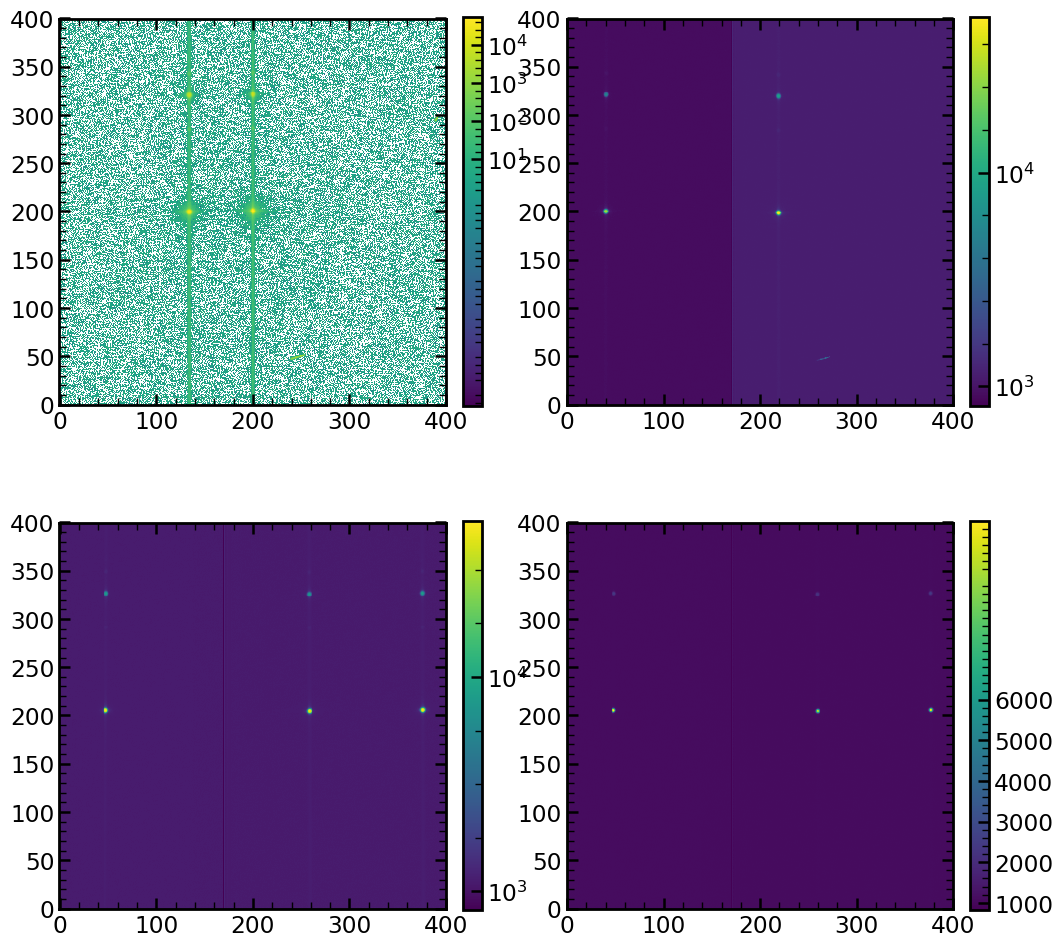

In [506]:
matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(old_data_Dec15_2017_reduced_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(222)
plt.imshow(old_data_Dec15_2017_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(223)
plt.imshow(new_data_Jan24_2019_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(224)
plt.imshow(new_data_Jan24_2019_cut25_only_Ar)
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([1000,2000,3000,4000,5000,6000])


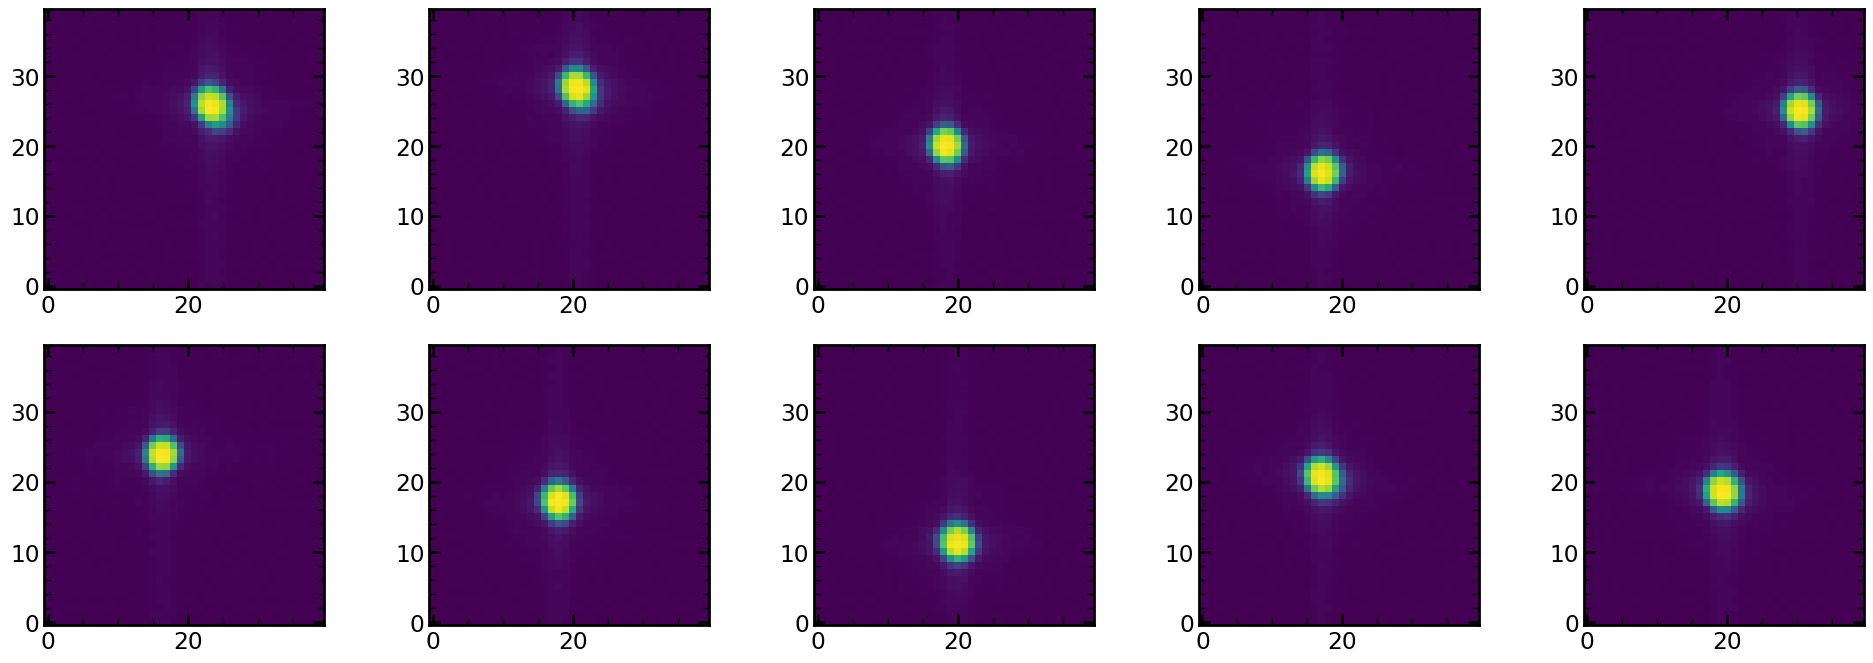

In [507]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

list_of_x_coordinates=[90,473,1341,1692,1329,2081,2258,2638,3952,4336]
list_of_y_coordinates=[3420,3397,3378,3373,3373,3368,3373,3382,3428,3409]
old_data_Dec15_2017_cut25s=[]
for i in range(10):
    old_data_Dec15_2017_cut25s.append(old_data_Dec15_2017[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
    
plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(old_data_Dec15_2017_cut25s[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(old_data_Dec15_2017_cut25s[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(old_data_Dec15_2017_cut25s[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(old_data_Dec15_2017_cut25s[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(old_data_Dec15_2017_cut25s[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(old_data_Dec15_2017_cut25s[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(old_data_Dec15_2017_cut25s[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(old_data_Dec15_2017_cut25s[7],norm=LogNorm())    

plt.subplot(259)
plt.imshow(old_data_Dec15_2017_cut25s[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(old_data_Dec15_2017_cut25s[9],norm=LogNorm()) 

In [508]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_old_data=[]
for i in range(10):
    max_flux_in_fibers_in_old_data.append(np.max(old_data_Dec15_2017_cut25s[i])-np.median(old_data_Dec15_2017_cut25s[i][:,0]))
    
max_flux_in_fibers_in_old_data

[54989.5,
 55597.0,
 48872.0,
 40238.0,
 48871.5,
 30076.5,
 52008.5,
 54224.0,
 59789.0,
 53170.0]

In [509]:
np.max(old_data_Dec15_2017_cut25s[5])

31000

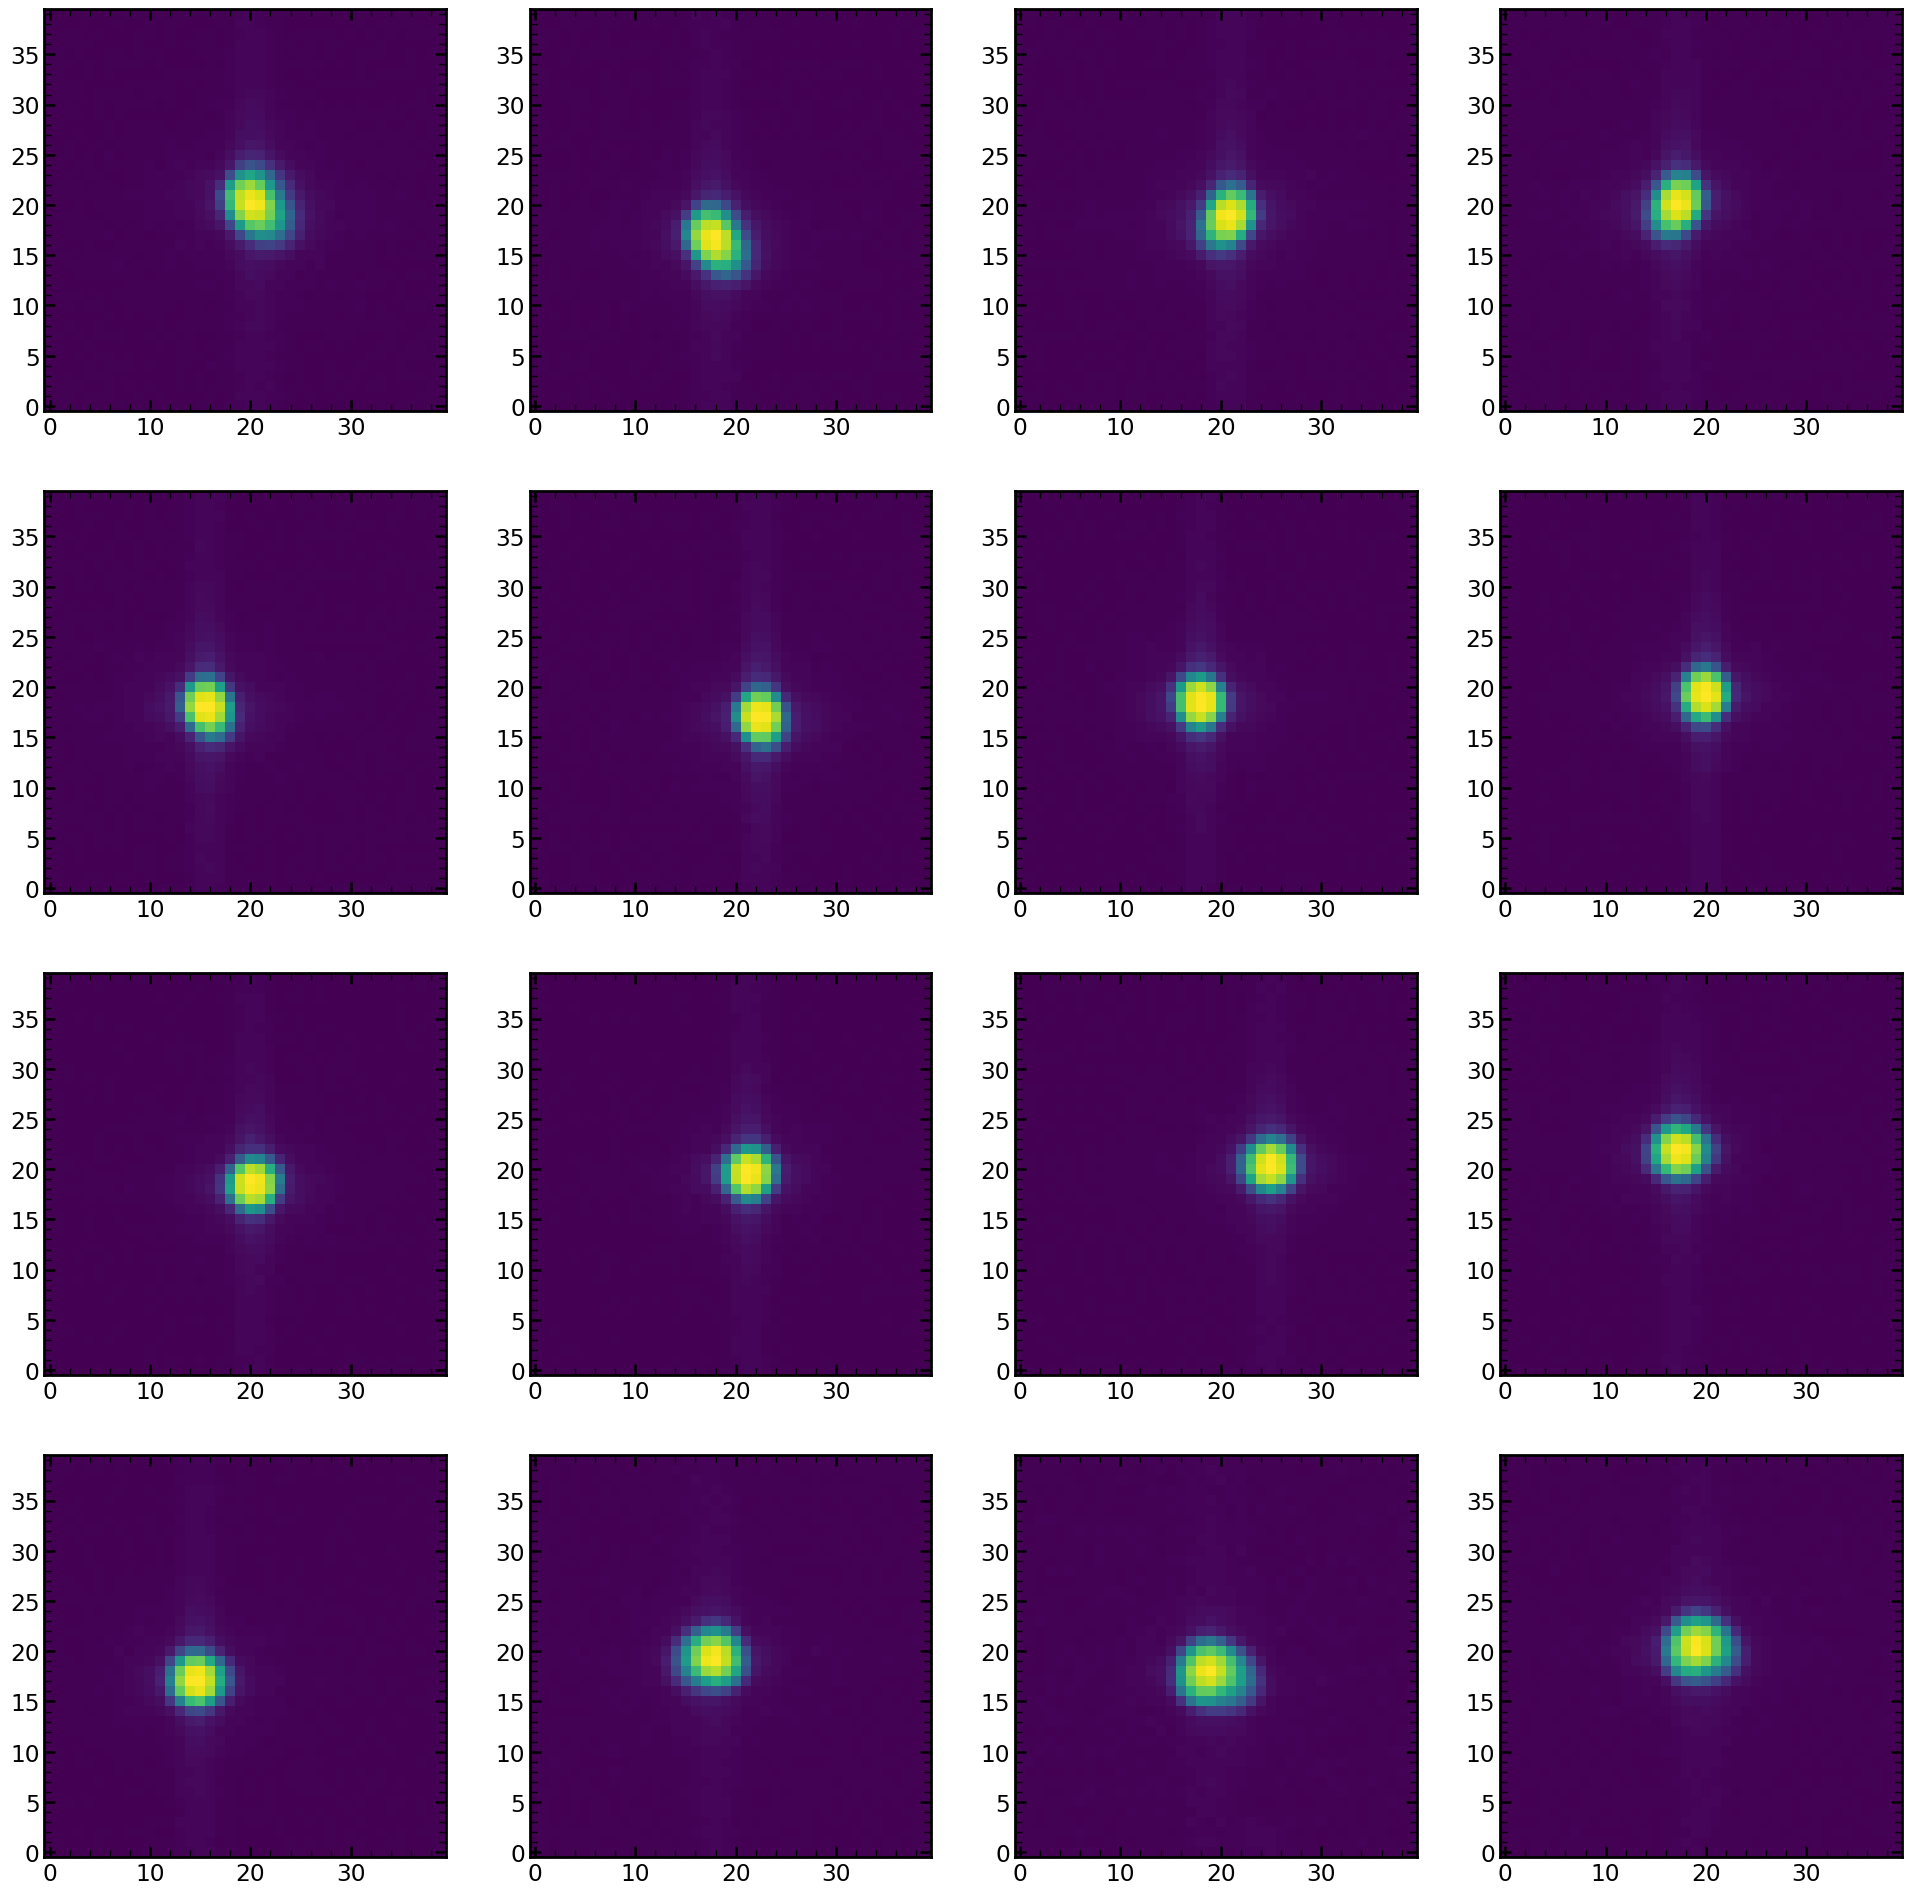

In [510]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

new_data_Jan24_2019_cut25s_only_Ar=[]
new_data_Jan24_2019_cut25s=[]

list_of_x_coordinates=[272,486,679,726,1329,1606,1712,2086,2296,2412,2618,2998,3192,3595,4132,4325]
list_of_y_coordinates=[3414,3408,3391,3391,3384,3381,3378,3378,3378,3378,3380,3387,3387,3407,3433,3420]
new_data_Jan24_2019_cut25s=[]
for i in range(16):
    new_data_Jan24_2019_cut25s.append(new_data_Jan24_2019[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

for i in range(16):
    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,24))
plt.subplot(441)
plt.imshow(new_data_Jan24_2019_cut25s[0],norm=LogNorm())
plt.subplot(442)
plt.imshow(new_data_Jan24_2019_cut25s[1],norm=LogNorm())
plt.subplot(443)
plt.imshow(new_data_Jan24_2019_cut25s[2],norm=LogNorm())
plt.subplot(444)
plt.imshow(new_data_Jan24_2019_cut25s[3],norm=LogNorm())

plt.subplot(445)
plt.imshow(new_data_Jan24_2019_cut25s[4],norm=LogNorm())
plt.subplot(446)
plt.imshow(new_data_Jan24_2019_cut25s[5],norm=LogNorm())
plt.subplot(447)
plt.imshow(new_data_Jan24_2019_cut25s[6],norm=LogNorm())
plt.subplot(448)
plt.imshow(new_data_Jan24_2019_cut25s[7],norm=LogNorm())

plt.subplot(449)
plt.imshow(new_data_Jan24_2019_cut25s[8],norm=LogNorm())
plt.subplot(4,4,10)
plt.imshow(new_data_Jan24_2019_cut25s[9],norm=LogNorm())
plt.subplot(4,4,11)
plt.imshow(new_data_Jan24_2019_cut25s[10],norm=LogNorm())
plt.subplot(4,4,12)
plt.imshow(new_data_Jan24_2019_cut25s[11],norm=LogNorm())

plt.subplot(4,4,13)
plt.imshow(new_data_Jan24_2019_cut25s[12],norm=LogNorm())
plt.subplot(4,4,14)
plt.imshow(new_data_Jan24_2019_cut25s[13],norm=LogNorm())
plt.subplot(4,4,15)
plt.imshow(new_data_Jan24_2019_cut25s[14],norm=LogNorm())
plt.subplot(4,4,16)
plt.imshow(new_data_Jan24_2019_cut25s[15],norm=LogNorm())


In [511]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data=[]
for i in range(16):
    max_flux_in_fibers_in_new_data.append(np.max(new_data_Jan24_2019_cut25s[i])-np.median(new_data_Jan24_2019_cut25s[i][:,0]))
    
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data_only_Ar=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_only_Ar.append(np.max(new_data_Jan24_2019_cut25s_only_Ar[i])-np.median(new_data_Jan24_2019_cut25s_only_Ar[i][:,0]))

In [512]:
max_flux_in_fibers_in_new_data_only_Ar

[7301.0,
 7345.0,
 9113.0,
 8170.0,
 10210.5,
 10551.0,
 9601.0,
 9265.5,
 8443.0,
 9167.5,
 7936.0,
 7841.5,
 7140.0,
 4628.5,
 2293.0,
 4590.0]

Text(0,0.5,'Max number of counts')

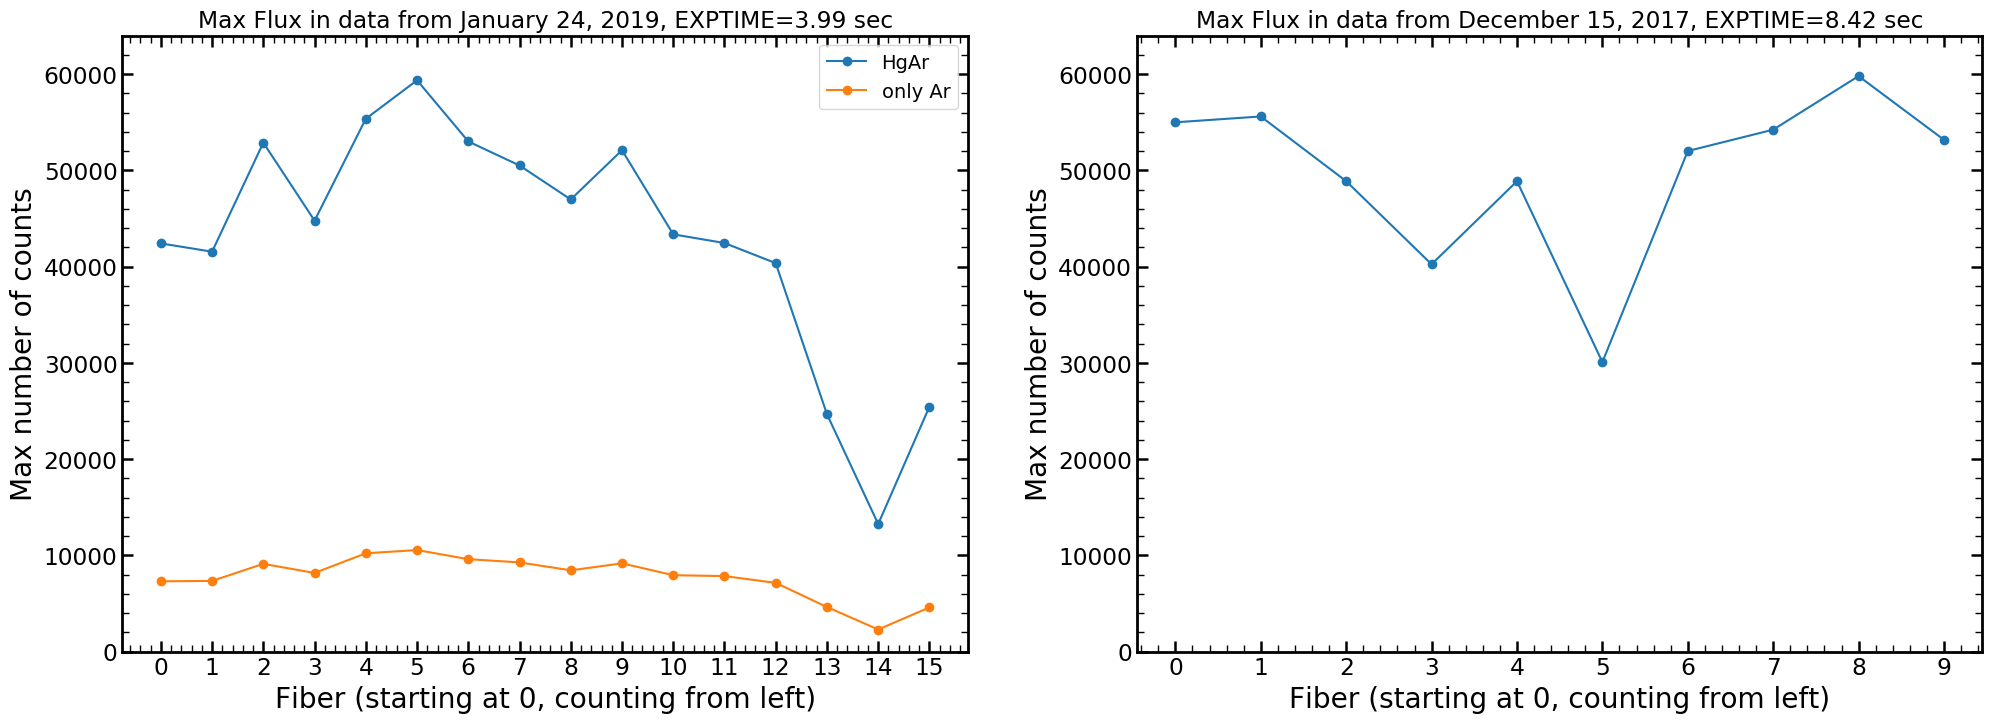

In [513]:
    
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_in_new_data,marker='o',label='HgAr')
plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
plt.xticks(range(16))
plt.ylim(0,64000)
plt.title('Max Flux in data from January 24, 2019, EXPTIME=3.99 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend()

plt.subplot(122)
plt.plot(max_flux_in_fibers_in_old_data,marker='o')
plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux in data from December 15, 2017, EXPTIME=8.42 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

In [533]:
res_HgAr_exposures[:,1]*3.999/8.34

array([200.61332429, 159.62103003, 123.40328399,  91.96008617,
        65.29143656,  43.39733517,  26.27778199,  13.93277703,
         6.36232028,   3.56641176,   5.54505144,  12.29823935,
        23.82597546,  40.1282598 ,  61.20509235,  87.05647312,
       117.6824021 , 153.0828793 , 193.25790471])

In [538]:
res_HgAr_exposures=[]
for i in np.unique(np.round(res_flux[:,1][0:],1)):
    res_HgAr_exposures.append([i,p4(i)])
    
res_HgAr_exposures=np.array(res_HgAr_exposures)

res_HgAr_exposures_modified=np.copy(res_HgAr_exposures)
res_HgAr_exposures_modified[:,1]=res_HgAr_exposures_modified[:,1]*3.999/8.34

In [539]:
res_HgAr_exposures_modified

array([[ -4.5       , 200.61332429],
       [ -4.        , 159.62103003],
       [ -3.5       , 123.40328399],
       [ -3.        ,  91.96008617],
       [ -2.5       ,  65.29143656],
       [ -2.        ,  43.39733517],
       [ -1.5       ,  26.27778199],
       [ -1.        ,  13.93277703],
       [ -0.5       ,   6.36232028],
       [  0.        ,   3.56641176],
       [  0.5       ,   5.54505144],
       [  1.        ,  12.29823935],
       [  1.5       ,  23.82597546],
       [  2.        ,  40.1282598 ],
       [  2.5       ,  61.20509235],
       [  3.        ,  87.05647312],
       [  3.5       , 117.6824021 ],
       [  4.        , 153.0828793 ],
       [  4.5       , 193.25790471]])

In [536]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures_modified[:,0][0+i])+res_HgAr_exposures_modified[:,0][-1-i])/2,np.floor((res_HgAr_exposures_modified[:,1][0+i]+res_HgAr_exposures_modified[:,1][-1-i])/2)])
    
res_HgAr_exposures_modified_round=np.array(res)
res_HgAr_exposures_modified_round

array([[  4.5, 196. ],
       [  4. , 156. ],
       [  3.5, 120. ],
       [  3. ,  89. ],
       [  2.5,  63. ],
       [  2. ,  41. ],
       [  1.5,  25. ],
       [  1. ,  13. ],
       [  0.5,   5. ],
       [  0. ,   3. ]])

In [517]:
res_HgAr_exposures_modified

array([[0.        , 3.56641176]])

## Neon data 

In [310]:
old_data_Dec15_2017=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2017-12-15/PFLA00869312.fits')[0].data
old_data_Dec15_2017_reduced=fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v0008693/PFLAr1.fits')[1].data
new_data_Jan24_2019=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data

In [311]:
# which object is the brightest
# how many images are in this stack - 3 (Stacked_Dithered=12, Stacked =3)
obs=8690
res=[]
for image_index in np.array([5,15,25,35,45,55,65,75,85,95]):
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci"+str(obs)+str(image_index)+'Stacked.npy')
    res.append([image_index,np.sum(sci_image),np.max(sci_image)])
    
res=np.array(res)

In [312]:
# from this we see that spot 65 is the brightest
res

array([[     5.        ,   4450.4375    ,    324.22302246],
       [    15.        ,   4943.53173828,    401.55349731],
       [    25.        ,   5546.07910156,    445.65759277],
       [    35.        ,  21249.40039062,   1768.12426758],
       [    45.        ,  79241.1328125 ,   6446.16210938],
       [    55.        , 143943.296875  ,  10709.30078125],
       [    65.        , 674670.75      ,  55138.26171875],
       [    75.        , 252569.953125  ,  20155.97851562],
       [    85.        , 174543.75      ,  14313.18457031],
       [    95.        , 124044.328125  ,  10409.8046875 ]])

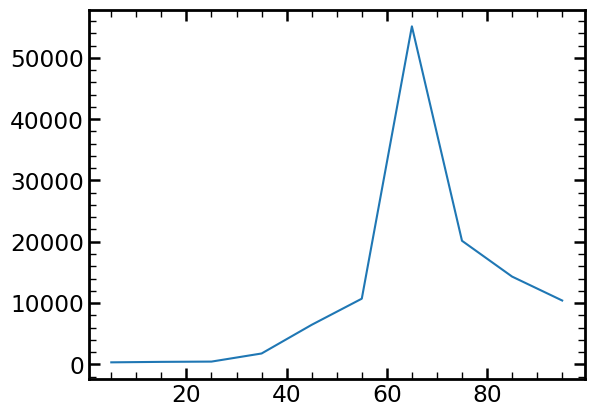

In [313]:
plt.plot(res[:,0],res[:,2])

In [314]:
# which object is the brightest
# how many images are in this stack - 12 (Stacked_Dithered=12, Stacked =3)
obs=8690
res=[]
for image_index in np.array([5,15,25,35,45,55,65,75,85,95]):
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci"+str(obs)+str(image_index)+'Stacked_Dithered.npy')
    res.append([image_index,np.sum(sci_image),np.max(sci_image)])
    
res=np.array(res)

res

array([[       5.        ,    65522.35166834,     1275.70770264],
       [      15.        ,    81780.04436734,     1560.40078735],
       [      25.        ,    88040.09813835,     1777.47592163],
       [      35.        ,   343414.15720771,     6973.84228516],
       [      45.        ,  1266031.14266743,    25535.31835938],
       [      55.        ,  2156779.88208435,    43502.8984375 ],
       [      65.        , 10783487.10600698,   219107.4609375 ],
       [      75.        ,  4027869.47300729,    81156.26953125],
       [      85.        ,  2785880.32528721,    56919.31054688],
       [      95.        ,  1980729.52396098,    40680.0390625 ]])

In [315]:
#2nd brightest spot
run_full=np.array([8576,8579,8582,8585,8588,8591,8594,8597,8600,8603])+90

res=[]
for obs in run_full:
    sci_image=np.load('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci'+str(obs)+'75Stacked.npy')
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])
    
res=np.array(res)
res_flux=res

res

array([[ 8666.        ,     0.        ,     1.006     , 20003.4609375 ],
       [ 8669.        ,     0.00001   ,     1.007     , 20660.18359375],
       [ 8672.        ,     0.        ,     1.006     , 19973.91992188],
       [ 8675.        ,    -0.        ,     1.006     , 20065.66015625],
       [ 8678.        ,    -0.00001   ,     1.006     , 20696.84375   ],
       [ 8681.        ,     0.00001   ,     1.011     , 20221.0859375 ],
       [ 8684.        ,     0.00001   ,     1.006     , 20042.16796875],
       [ 8687.        ,    -0.        ,     1.006     , 20517.53125   ],
       [ 8690.        ,    -0.00001   ,     1.006     , 20155.97851562],
       [ 8693.        ,     0.00001   ,     1.686     , 34053.453125  ]])

In [316]:
#3rd brightest spot
run_full=np.array([8576,8579,8582,8585,8588,8591,8594,8597,8600,8603])+90

res=[]
for obs in run_full:
    sci_image=np.load('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci'+str(obs)+'55Stacked.npy')
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])
    
res=np.array(res)
res_flux=res

res

array([[ 8666.        ,     0.        ,     1.006     , 10703.41601562],
       [ 8669.        ,     0.00001   ,     1.007     , 10808.49609375],
       [ 8672.        ,     0.        ,     1.006     , 10795.69042969],
       [ 8675.        ,    -0.        ,     1.006     , 10802.90820312],
       [ 8678.        ,    -0.00001   ,     1.006     , 11188.078125  ],
       [ 8681.        ,     0.00001   ,     1.011     , 10795.5       ],
       [ 8684.        ,     0.00001   ,     1.006     , 10771.83007812],
       [ 8687.        ,    -0.        ,     1.006     , 10781.20898438],
       [ 8690.        ,    -0.00001   ,     1.006     , 10709.30078125],
       [ 8693.        ,     0.00001   ,     1.686     , 18292.14453125]])

In [317]:
with open('/Users/nevencaplar/Documents/PFS/Data_Nov_14/Dataframes/finalNe_expanded.pkl', 'rb') as f:
    finalNe=pickle.load(f)

# in the old, reduced data
y=1142

# in the old, non-reduced data
y=1192

size=20

list_of_x_coordinates=[100,478,1341,1689,2077,2255,2639,2986,3953,4339]
list_of_y_coordinates=[1233,1217,1197,1189,1192,1189,1194,1200,1236,1219]

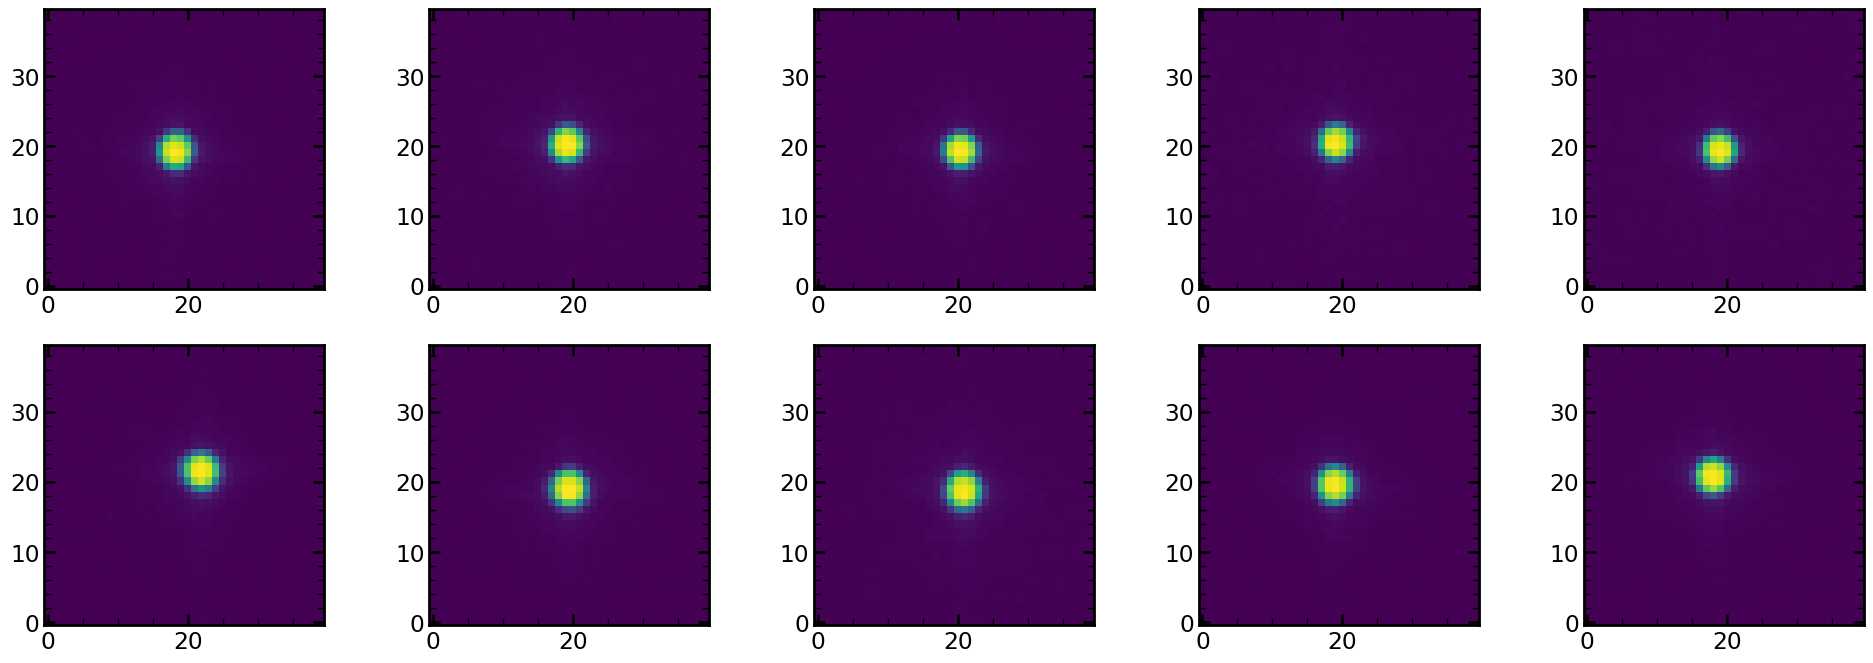

In [318]:
old_data_Dec15_2017_cut25s=[]
for i in range(10):
    old_data_Dec15_2017_cut25s.append(old_data_Dec15_2017[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
    
plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(old_data_Dec15_2017_cut25s[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(old_data_Dec15_2017_cut25s[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(old_data_Dec15_2017_cut25s[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(old_data_Dec15_2017_cut25s[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(old_data_Dec15_2017_cut25s[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(old_data_Dec15_2017_cut25s[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(old_data_Dec15_2017_cut25s[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(old_data_Dec15_2017_cut25s[7],norm=LogNorm())    

plt.subplot(259)
plt.imshow(old_data_Dec15_2017_cut25s[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(old_data_Dec15_2017_cut25s[9],norm=LogNorm()) 

In [319]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_old_data=[]
for i in range(10):
    max_flux_in_fibers_in_old_data.append(np.max(old_data_Dec15_2017_cut25s[i])-np.median(old_data_Dec15_2017_cut25s[i][:,0]))
    
max_flux_in_fibers_in_old_data

[37018.0,
 34673.0,
 28304.0,
 21972.5,
 18063.0,
 30319.5,
 30577.0,
 35765.0,
 36297.0,
 34237.0]

In [320]:
size=20

list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]
list_of_y_coordinates=[1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229]

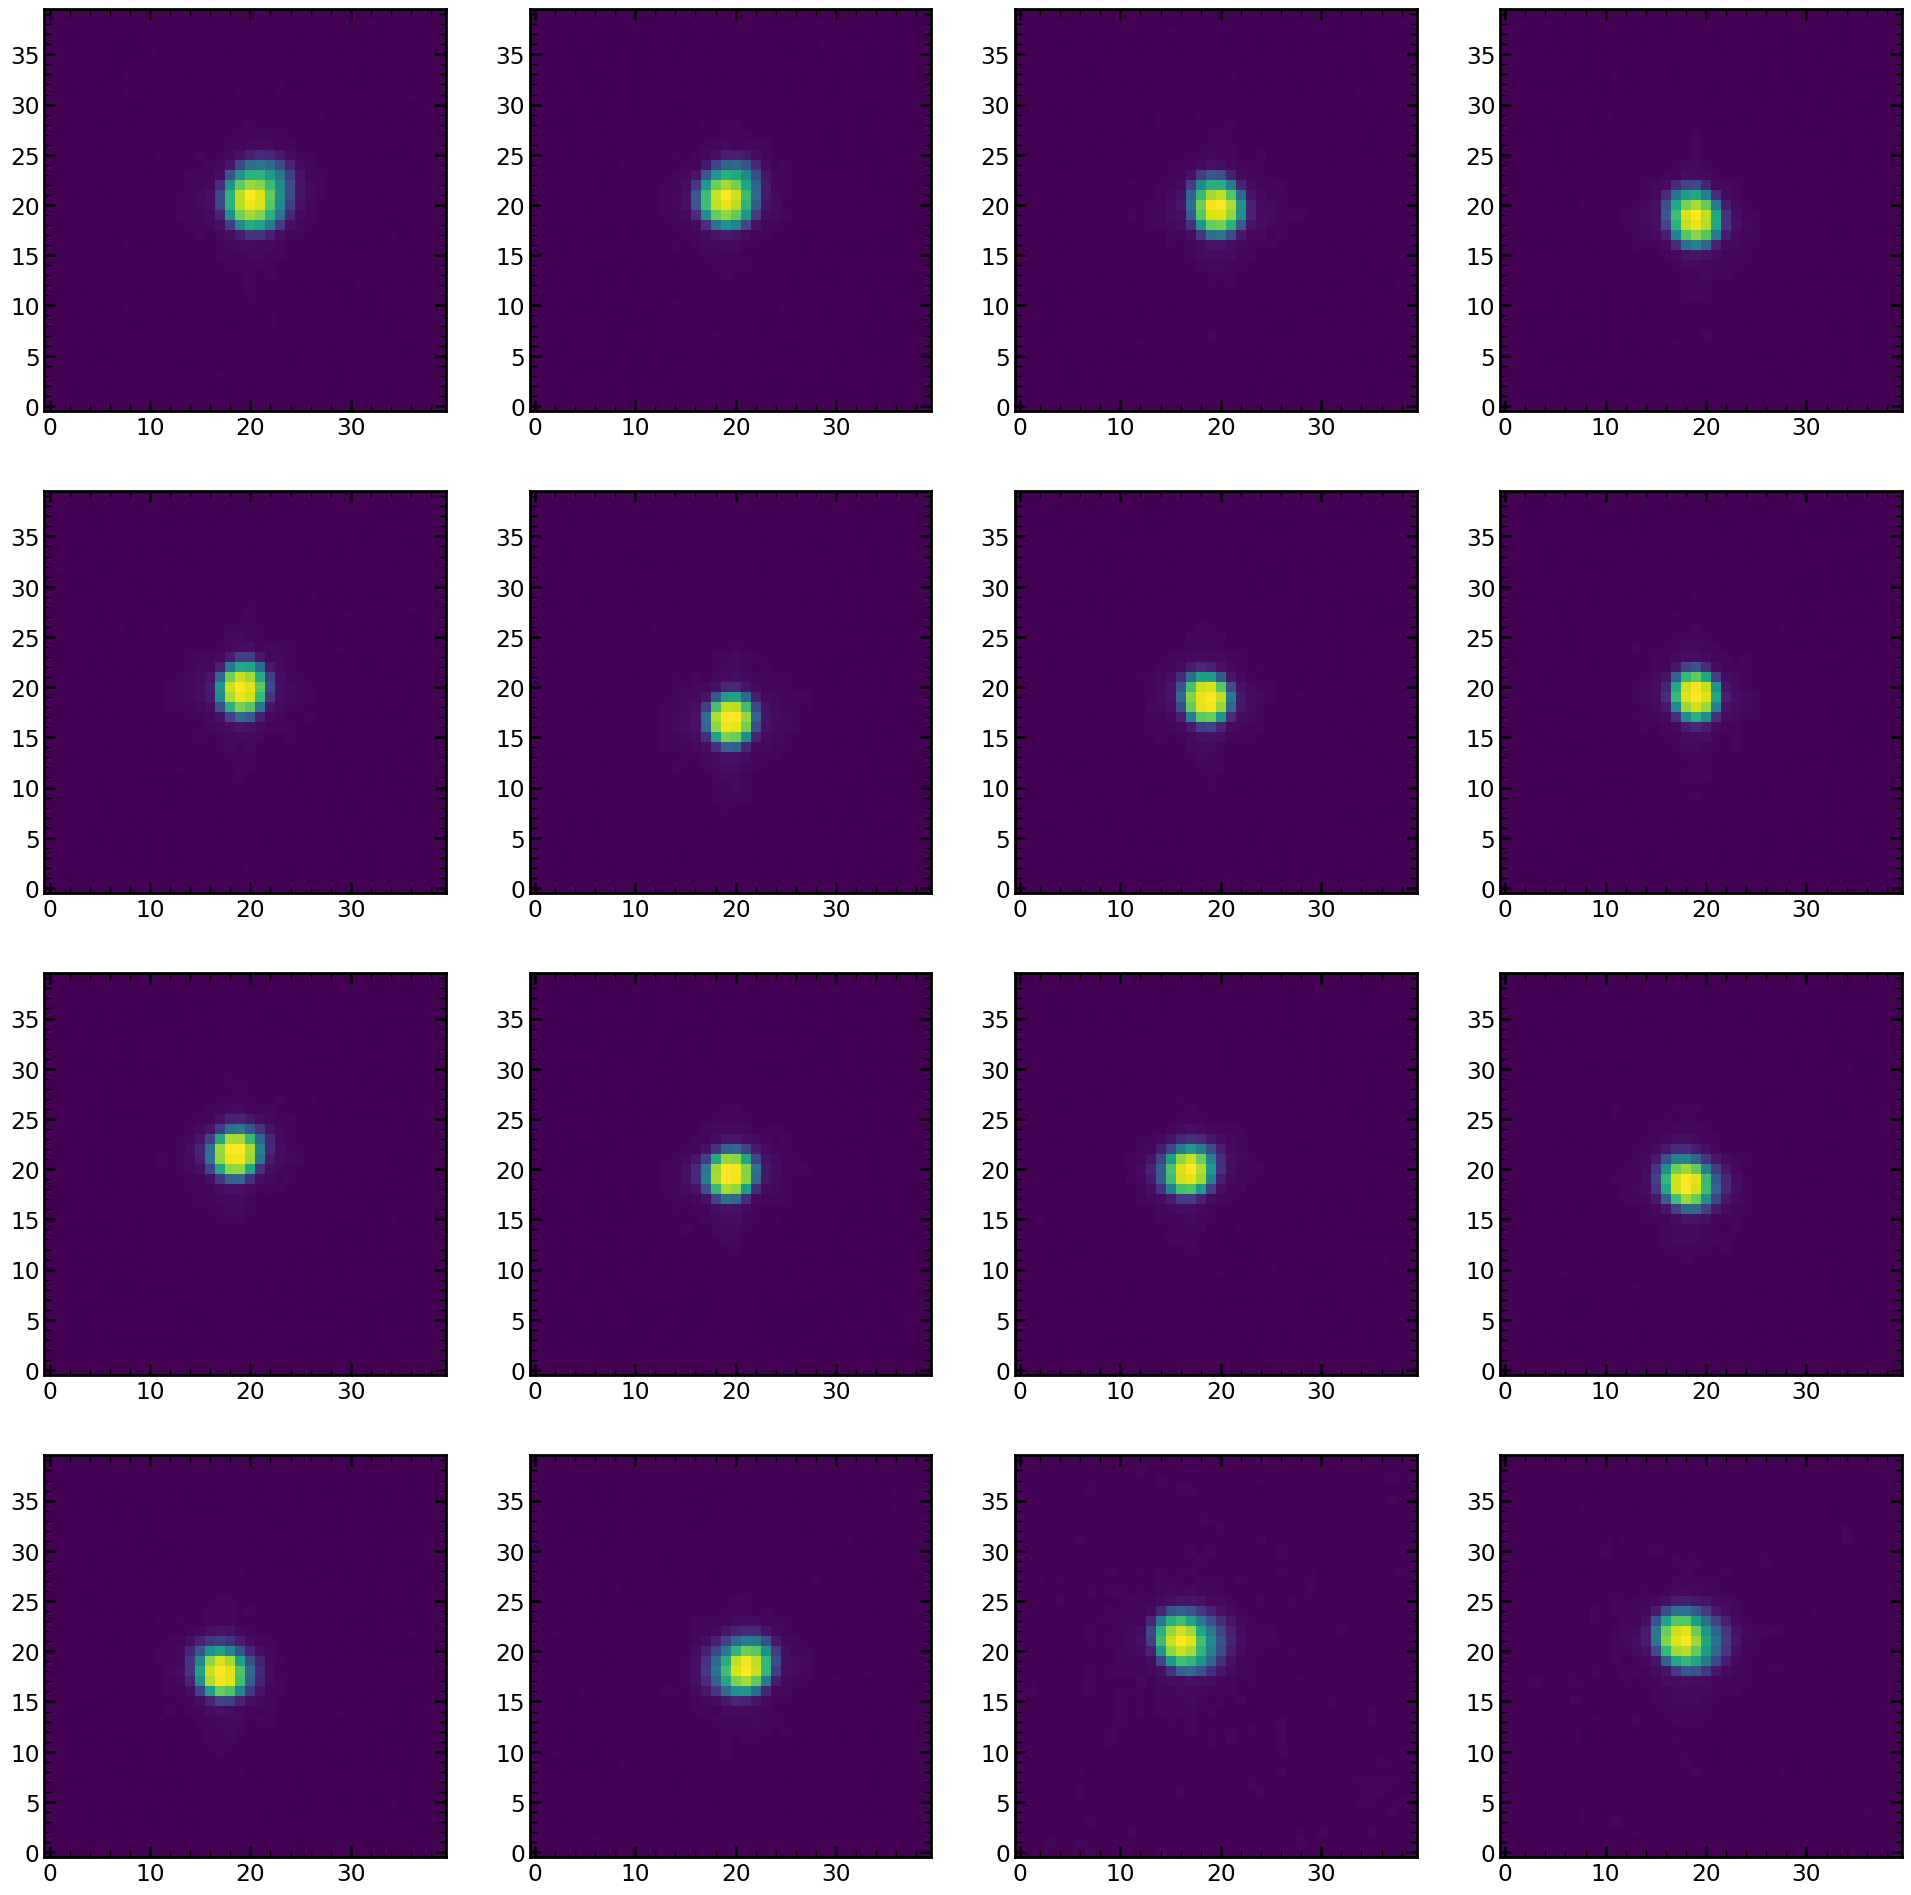

In [321]:
new_data_Jan24_2019_cut25s=[]

for i in range(16):
    new_data_Jan24_2019_cut25s.append(new_data_Jan24_2019[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
 
plt.figure(figsize=(24,24))
plt.subplot(441)
plt.imshow(new_data_Jan24_2019_cut25s[0],norm=LogNorm())
plt.subplot(442)
plt.imshow(new_data_Jan24_2019_cut25s[1],norm=LogNorm())
plt.subplot(443)
plt.imshow(new_data_Jan24_2019_cut25s[2],norm=LogNorm())
plt.subplot(444)
plt.imshow(new_data_Jan24_2019_cut25s[3],norm=LogNorm())

plt.subplot(445)
plt.imshow(new_data_Jan24_2019_cut25s[4],norm=LogNorm())
plt.subplot(446)
plt.imshow(new_data_Jan24_2019_cut25s[5],norm=LogNorm())
plt.subplot(447)
plt.imshow(new_data_Jan24_2019_cut25s[6],norm=LogNorm())
plt.subplot(448)
plt.imshow(new_data_Jan24_2019_cut25s[7],norm=LogNorm())

plt.subplot(449)
plt.imshow(new_data_Jan24_2019_cut25s[8],norm=LogNorm())
plt.subplot(4,4,10)
plt.imshow(new_data_Jan24_2019_cut25s[9],norm=LogNorm())
plt.subplot(4,4,11)
plt.imshow(new_data_Jan24_2019_cut25s[10],norm=LogNorm())
plt.subplot(4,4,12)
plt.imshow(new_data_Jan24_2019_cut25s[11],norm=LogNorm())

plt.subplot(4,4,13)
plt.imshow(new_data_Jan24_2019_cut25s[12],norm=LogNorm())
plt.subplot(4,4,14)
plt.imshow(new_data_Jan24_2019_cut25s[13],norm=LogNorm())
plt.subplot(4,4,15)
plt.imshow(new_data_Jan24_2019_cut25s[14],norm=LogNorm())
plt.subplot(4,4,16)
plt.imshow(new_data_Jan24_2019_cut25s[15],norm=LogNorm())


In [322]:
np.max(new_data_Jan24_2019_cut25s[0])

19739

In [323]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data=[]
for i in range(16):
    max_flux_in_fibers_in_new_data.append(np.max(new_data_Jan24_2019_cut25s[i])-np.median(new_data_Jan24_2019_cut25s[i][:,0]))

Text(0,0.5,'Max number of counts')

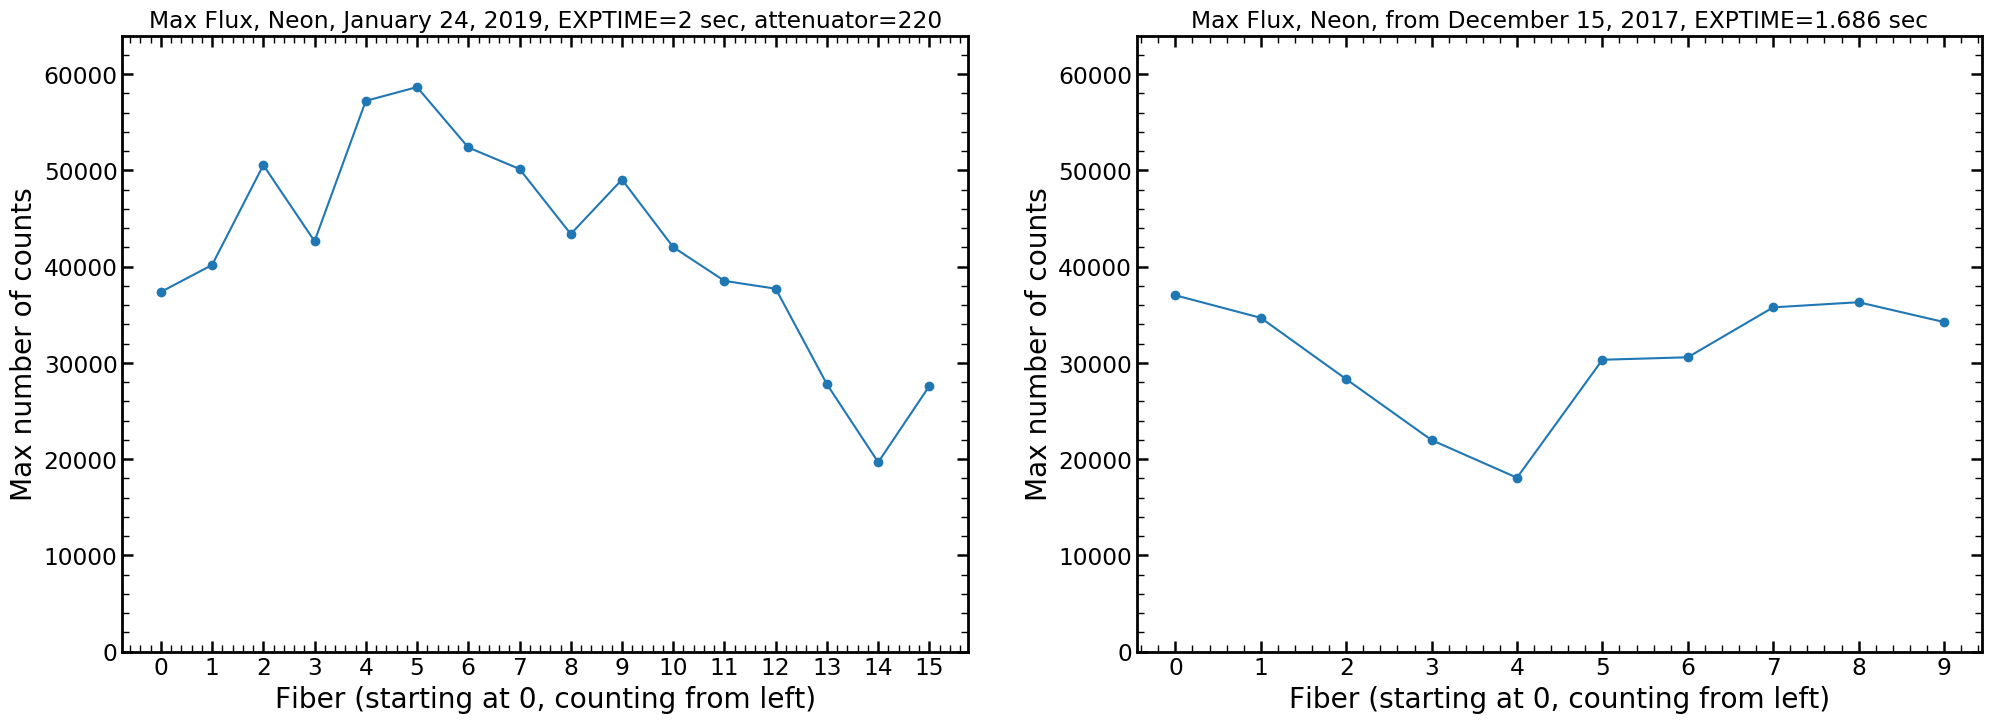

In [349]:
    
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(np.array(max_flux_in_fibers_in_new_data)*2,marker='o')
plt.xticks(range(16))
plt.ylim(0,64000)
plt.title('Max Flux, Neon, January 24, 2019, EXPTIME=2 sec, attenuator=220')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

plt.subplot(122)
plt.plot(np.array(max_flux_in_fibers_in_old_data),marker='o')
plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux, Neon, from December 15, 2017, EXPTIME=1.686 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

In [346]:
res_Neon_exposures=np.copy(res_HgAr_exposures_round)
res_Neon_exposures[:,1]=np.round(res_Neon_exposures[:,1]/((7*1.5)/(3)),1)

In [347]:
res_Neon_exposures

array([[  4.5, 117.4],
       [  4. ,  93.1],
       [  3.5,  71.7],
       [  3. ,  53.4],
       [  2.5,  37.7],
       [  2. ,  24.9],
       [  1.5,  14.9],
       [  1. ,   7.7],
       [  0.5,   3.4],
       [  0. ,   2. ]])

## how much attenuator attenuates? - faintest line

In [711]:

new_data_Jan24_2019_11433=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143312.fits')[0].data
new_data_Jan24_2019_11434=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143412.fits')[0].data
new_data_Jan24_2019_11435=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143512.fits')[0].data
new_data_Jan24_2019_11436=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143612.fits')[0].data
new_data_Jan24_2019_11437=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143712.fits')[0].data
new_data_Jan24_2019_11438=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data
new_data_Jan24_2019_11439=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143912.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11444=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144412.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11445=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144512.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11446=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144612.fits')[0].data
# W_AITATT =185
new_data_Jan24_2019_11447=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144712.fits')[0].data
# W_AITATT =190
new_data_Jan24_2019_11448=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144812.fits')[0].data
# W_AITATT =195
new_data_Jan24_2019_11449=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144912.fits')[0].data
# W_AITATT =200
new_data_Jan24_2019_11450=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145012.fits')[0].data
# W_AITATT =205
new_data_Jan24_2019_11451=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145112.fits')[0].data
# W_AITATT =210
new_data_Jan24_2019_11452=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145212.fits')[0].data
# W_AITATT =215
new_data_Jan24_2019_11453=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145312.fits')[0].data
# W_AITATT =220
new_data_Jan24_2019_11454=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145412.fits')[0].data
# W_AITATT =225
new_data_Jan24_2019_11455=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145512.fits')[0].data
# W_AITATT =230
new_data_Jan24_2019_11456=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145612.fits')[0].data
# W_AITATT =235
new_data_Jan24_2019_11457=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145712.fits')[0].data
# W_AITATT =240
new_data_Jan24_2019_11458=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145812.fits')[0].data
# W_AITATT =245
new_data_Jan24_2019_11459=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145912.fits')[0].data
# W_AITATT =250
new_data_Jan24_2019_11460=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146012.fits')[0].data
# W_AITATT =255
new_data_Jan24_2019_11461=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146112.fits')[0].data

size=20


list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]

# bright line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])

# faint line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])-740-74

# faintest line
list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])+1306

In [712]:
new_data_Jan24_2019_cut25s_11433=[]
new_data_Jan24_2019_cut25s_11434=[]
new_data_Jan24_2019_cut25s_11435=[]
new_data_Jan24_2019_cut25s_11436=[]
new_data_Jan24_2019_cut25s_11437=[]
new_data_Jan24_2019_cut25s_11438=[]
new_data_Jan24_2019_cut25s_11439=[]

new_data_Jan24_2019_cut25s_11444=[]
new_data_Jan24_2019_cut25s_11445=[]
new_data_Jan24_2019_cut25s_11446=[]
new_data_Jan24_2019_cut25s_11447=[]
new_data_Jan24_2019_cut25s_11448=[]
new_data_Jan24_2019_cut25s_11449=[]
new_data_Jan24_2019_cut25s_11450=[]
new_data_Jan24_2019_cut25s_11451=[]
new_data_Jan24_2019_cut25s_11452=[]
new_data_Jan24_2019_cut25s_11453=[]
new_data_Jan24_2019_cut25s_11454=[]
new_data_Jan24_2019_cut25s_11455=[]
new_data_Jan24_2019_cut25s_11456=[]
new_data_Jan24_2019_cut25s_11457=[]
new_data_Jan24_2019_cut25s_11458=[]
new_data_Jan24_2019_cut25s_11459=[]
new_data_Jan24_2019_cut25s_11460=[]
new_data_Jan24_2019_cut25s_11461=[]
new_data_Jan24_2019_cut25s_11457=[]

for i in range(16):
    new_data_Jan24_2019_cut25s_11433.append(new_data_Jan24_2019_11433[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11434.append(new_data_Jan24_2019_11434[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11435.append(new_data_Jan24_2019_11435[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11436.append(new_data_Jan24_2019_11436[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11437.append(new_data_Jan24_2019_11437[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11438.append(new_data_Jan24_2019_11438[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11439.append(new_data_Jan24_2019_11439[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
for i in range(16):
    new_data_Jan24_2019_cut25s_11444.append(new_data_Jan24_2019_11444[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11445.append(new_data_Jan24_2019_11445[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11446.append(new_data_Jan24_2019_11446[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11447.append(new_data_Jan24_2019_11447[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11448.append(new_data_Jan24_2019_11448[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11449.append(new_data_Jan24_2019_11449[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11450.append(new_data_Jan24_2019_11450[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11451.append(new_data_Jan24_2019_11451[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11452.append(new_data_Jan24_2019_11452[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11453.append(new_data_Jan24_2019_11453[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11454.append(new_data_Jan24_2019_11454[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11455.append(new_data_Jan24_2019_11455[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11456.append(new_data_Jan24_2019_11456[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11457.append(new_data_Jan24_2019_11457[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11458.append(new_data_Jan24_2019_11458[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11459.append(new_data_Jan24_2019_11459[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11460.append(new_data_Jan24_2019_11460[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11461.append(new_data_Jan24_2019_11461[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
             

In [713]:
max_flux_in_fibers_in_new_data_11433=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11433.append(np.max(new_data_Jan24_2019_cut25s_11433[i])-np.median(new_data_Jan24_2019_cut25s_11433[i][:,0]))
    
max_flux_in_fibers_in_new_data_11434=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11434.append(np.max(new_data_Jan24_2019_cut25s_11434[i])-np.median(new_data_Jan24_2019_cut25s_11434[i][:,0]))
    
max_flux_in_fibers_in_new_data_11435=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11435.append(np.max(new_data_Jan24_2019_cut25s_11435[i])-np.median(new_data_Jan24_2019_cut25s_11435[i][:,0]))
    
max_flux_in_fibers_in_new_data_11436=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11436.append(np.max(new_data_Jan24_2019_cut25s_11436[i])-np.median(new_data_Jan24_2019_cut25s_11436[i][:,0]))
    
max_flux_in_fibers_in_new_data_11437=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11437.append(np.max(new_data_Jan24_2019_cut25s_11437[i])-np.median(new_data_Jan24_2019_cut25s_11437[i][:,0]))
    
max_flux_in_fibers_in_new_data_11438=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11438.append(np.max(new_data_Jan24_2019_cut25s_11438[i])-np.median(new_data_Jan24_2019_cut25s_11438[i][:,0]))
    
max_flux_in_fibers_in_new_data_11439=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11439.append(np.max(new_data_Jan24_2019_cut25s_11439[i])-np.median(new_data_Jan24_2019_cut25s_11439[i][:,0]))
    
    
max_flux_in_fibers_in_new_data_11444=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11444.append(np.max(new_data_Jan24_2019_cut25s_11444[i])-np.median(new_data_Jan24_2019_cut25s_11444[i][:,0]))
    
max_flux_in_fibers_in_new_data_11445=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11445.append(np.max(new_data_Jan24_2019_cut25s_11445[i])-np.median(new_data_Jan24_2019_cut25s_11445[i][:,0]))
    
max_flux_in_fibers_in_new_data_11446=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11446.append(np.max(new_data_Jan24_2019_cut25s_11446[i])-np.median(new_data_Jan24_2019_cut25s_11446[i][:,0]))
    
max_flux_in_fibers_in_new_data_11447=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11447.append(np.max(new_data_Jan24_2019_cut25s_11447[i])-np.median(new_data_Jan24_2019_cut25s_11447[i][:,0]))
    
max_flux_in_fibers_in_new_data_11448=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11448.append(np.max(new_data_Jan24_2019_cut25s_11448[i])-np.median(new_data_Jan24_2019_cut25s_11448[i][:,0]))
    
max_flux_in_fibers_in_new_data_11449=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11449.append(np.max(new_data_Jan24_2019_cut25s_11449[i])-np.median(new_data_Jan24_2019_cut25s_11449[i][:,0]))
    
max_flux_in_fibers_in_new_data_11450=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11450.append(np.max(new_data_Jan24_2019_cut25s_11450[i])-np.median(new_data_Jan24_2019_cut25s_11450[i][:,0]))

max_flux_in_fibers_in_new_data_11451=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11451.append(np.max(new_data_Jan24_2019_cut25s_11451[i])-np.median(new_data_Jan24_2019_cut25s_11451[i][:,0]))
    
max_flux_in_fibers_in_new_data_11452=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11452.append(np.max(new_data_Jan24_2019_cut25s_11452[i])-np.median(new_data_Jan24_2019_cut25s_11452[i][:,0]))
    
max_flux_in_fibers_in_new_data_11453=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11453.append(np.max(new_data_Jan24_2019_cut25s_11453[i])-np.median(new_data_Jan24_2019_cut25s_11453[i][:,0]))
    
max_flux_in_fibers_in_new_data_11454=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11454.append(np.max(new_data_Jan24_2019_cut25s_11454[i])-np.median(new_data_Jan24_2019_cut25s_11454[i][:,0]))
    
max_flux_in_fibers_in_new_data_11455=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11455.append(np.max(new_data_Jan24_2019_cut25s_11455[i])-np.median(new_data_Jan24_2019_cut25s_11455[i][:,0]))
    
max_flux_in_fibers_in_new_data_11456=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11456.append(np.max(new_data_Jan24_2019_cut25s_11456[i])-np.median(new_data_Jan24_2019_cut25s_11456[i][:,0]))
    
max_flux_in_fibers_in_new_data_11457=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11457.append(np.max(new_data_Jan24_2019_cut25s_11457[i])-np.median(new_data_Jan24_2019_cut25s_11457[i][:,0]))
    
max_flux_in_fibers_in_new_data_11458=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11458.append(np.max(new_data_Jan24_2019_cut25s_11458[i])-np.median(new_data_Jan24_2019_cut25s_11458[i][:,0]))
    
max_flux_in_fibers_in_new_data_11459=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11459.append(np.max(new_data_Jan24_2019_cut25s_11459[i])-np.median(new_data_Jan24_2019_cut25s_11459[i][:,0]))
    
max_flux_in_fibers_in_new_data_11460=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11460.append(np.max(new_data_Jan24_2019_cut25s_11460[i])-np.median(new_data_Jan24_2019_cut25s_11460[i][:,0]))
    
max_flux_in_fibers_in_new_data_11461=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11461.append(np.max(new_data_Jan24_2019_cut25s_11461[i])-np.median(new_data_Jan24_2019_cut25s_11461[i][:,0]))


    

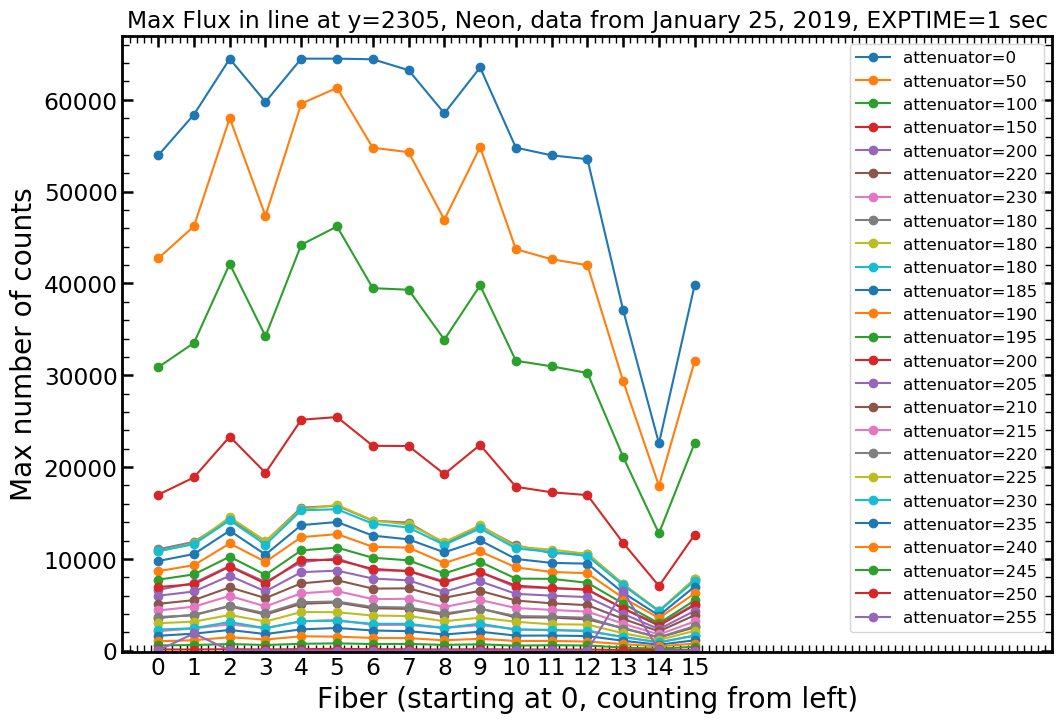

In [714]:
plt.figure(figsize=(12,8))
plt.plot(np.array(max_flux_in_fibers_in_new_data_11433),marker='o',label='attenuator=0')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11434),marker='o',label='attenuator=50')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11435),marker='o',label='attenuator=100')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11436),marker='o',label='attenuator=150')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11437),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11438),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11439),marker='o',label='attenuator=230')

plt.plot(np.array(max_flux_in_fibers_in_new_data_11444),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11445),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11446),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11447),marker='o',label='attenuator=185')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11448),marker='o',label='attenuator=190')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11449),marker='o',label='attenuator=195')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11450),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11451),marker='o',label='attenuator=205')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11452),marker='o',label='attenuator=210')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11453),marker='o',label='attenuator=215')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11454),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11455),marker='o',label='attenuator=225')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11456),marker='o',label='attenuator=230')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11457),marker='o',label='attenuator=235')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11458),marker='o',label='attenuator=240')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11459),marker='o',label='attenuator=245')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11460),marker='o',label='attenuator=250')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11461),marker='o',label='attenuator=255')

plt.xticks(range(16))
plt.xlim(-1,25)
plt.ylim(-100,67000)
plt.title('Max Flux in line at y=2305, Neon, data from January 25, 2019, EXPTIME=1 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend(fontsize=12)

In [715]:
flux_with_att=np.transpose(np.array(np.split(np.concatenate((max_flux_in_fibers_in_new_data_11433,max_flux_in_fibers_in_new_data_11434,max_flux_in_fibers_in_new_data_11435,max_flux_in_fibers_in_new_data_11436,
                                                             max_flux_in_fibers_in_new_data_11437,np.array(max_flux_in_fibers_in_new_data_11438),np.array(max_flux_in_fibers_in_new_data_11439)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11444),np.array(max_flux_in_fibers_in_new_data_11445),np.array(max_flux_in_fibers_in_new_data_11446)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11447),np.array(max_flux_in_fibers_in_new_data_11448),np.array(max_flux_in_fibers_in_new_data_11449)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11450),np.array(max_flux_in_fibers_in_new_data_11451),np.array(max_flux_in_fibers_in_new_data_11452)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11453),np.array(max_flux_in_fibers_in_new_data_11454),np.array(max_flux_in_fibers_in_new_data_11455)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11456),np.array(max_flux_in_fibers_in_new_data_11457),np.array(max_flux_in_fibers_in_new_data_11458)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11459),np.array(max_flux_in_fibers_in_new_data_11460),np.array(max_flux_in_fibers_in_new_data_11461)),axis=0),25)))

In [716]:
att_values=[0,50,100,150,200,220,230,180,180,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255]
positions_of_att_values_larger_than_200=np.where(np.array(att_values)>=200)[0]
att_values_larger_than_200=np.array(att_values)[positions_of_att_values_larger_than_200]

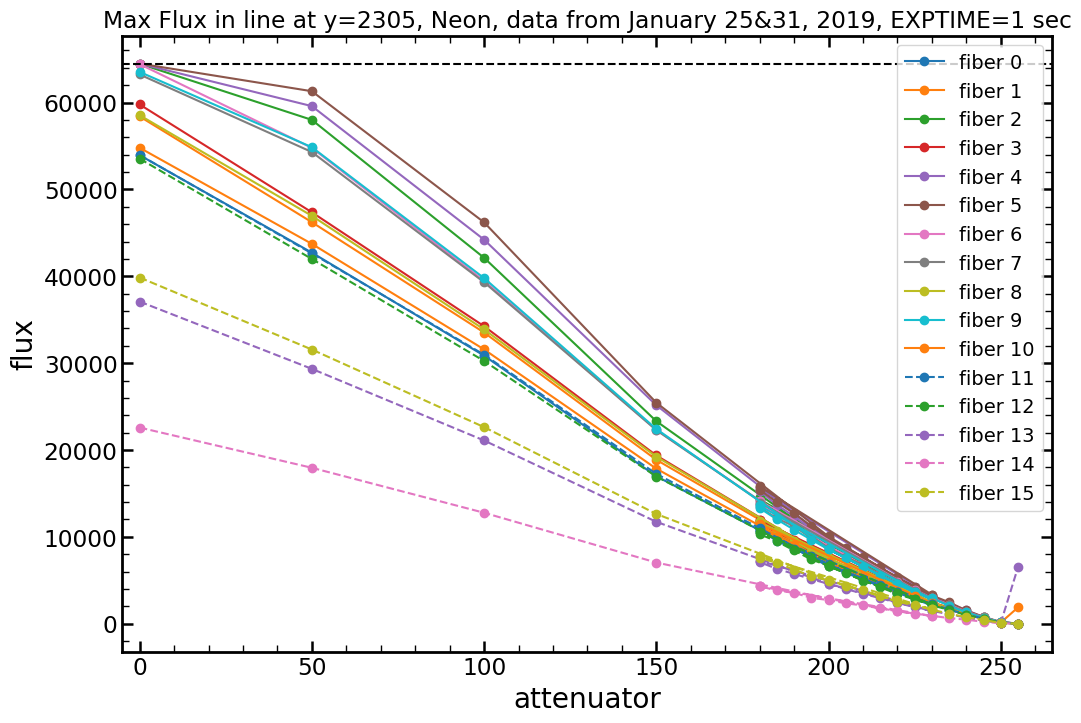

In [717]:
plt.figure(figsize=(12,8))
plt.title('Max Flux in line at y=2305, Neon, data from January 25&31, 2019, EXPTIME=1 sec')
plt.plot(att_values,flux_with_att[0],marker='o',label='fiber 0',color=plt.cm.tab10(0.0))
plt.plot(att_values,flux_with_att[1],marker='o',label='fiber 1',color=plt.cm.tab10(0.1))
plt.plot(att_values,flux_with_att[2],marker='o',label='fiber 2',color=plt.cm.tab10(0.2))
plt.plot(att_values,flux_with_att[3],marker='o',label='fiber 3',color=plt.cm.tab10(0.3))
plt.plot(att_values,flux_with_att[4],marker='o',label='fiber 4',color=plt.cm.tab10(0.4))
plt.plot(att_values,flux_with_att[5],marker='o',label='fiber 5',color=plt.cm.tab10(0.5))
plt.plot(att_values,flux_with_att[6],marker='o',label='fiber 6',color=plt.cm.tab10(0.6))
plt.plot(att_values,flux_with_att[7],marker='o',label='fiber 7',color=plt.cm.tab10(0.7))
plt.plot(att_values,flux_with_att[8],marker='o',label='fiber 8',color=plt.cm.tab10(0.8))
plt.plot(att_values,flux_with_att[9],marker='o',label='fiber 9',color=plt.cm.tab10(0.9))
plt.plot(att_values,flux_with_att[10],marker='o',label='fiber 10',color=plt.cm.tab10(1))
plt.plot(att_values,flux_with_att[11],marker='o',label='fiber 11',color=plt.cm.tab10(0.0),ls='--')
plt.plot(att_values,flux_with_att[12],marker='o',label='fiber 12',color=plt.cm.tab10(0.2),ls='--')
plt.plot(att_values,flux_with_att[13],marker='o',label='fiber 13',color=plt.cm.tab10(0.4),ls='--')
plt.plot(att_values,flux_with_att[14],marker='o',label='fiber 14',color=plt.cm.tab10(0.6),ls='--')
plt.plot(att_values,flux_with_att[15],marker='o',label='fiber 15',color=plt.cm.tab10(0.8),ls='--')
plt.axhline(y=64487, color='black', linestyle='--')
plt.xlabel('attenuator')
plt.ylabel('flux')
plt.xlim(-5,265)
plt.legend()


In [718]:
import scipy.optimize

def func(x, a, b, c,d):
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

popt14, pcov = scipy.optimize.curve_fit(func, att_values, flux_with_att[14]/np.max(flux_with_att[14]))
popt14_200, pcov = scipy.optimize.curve_fit(func, np.array(att_values)[positions_of_att_values_larger_than_200], flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]))


(-0.05, 1.05)

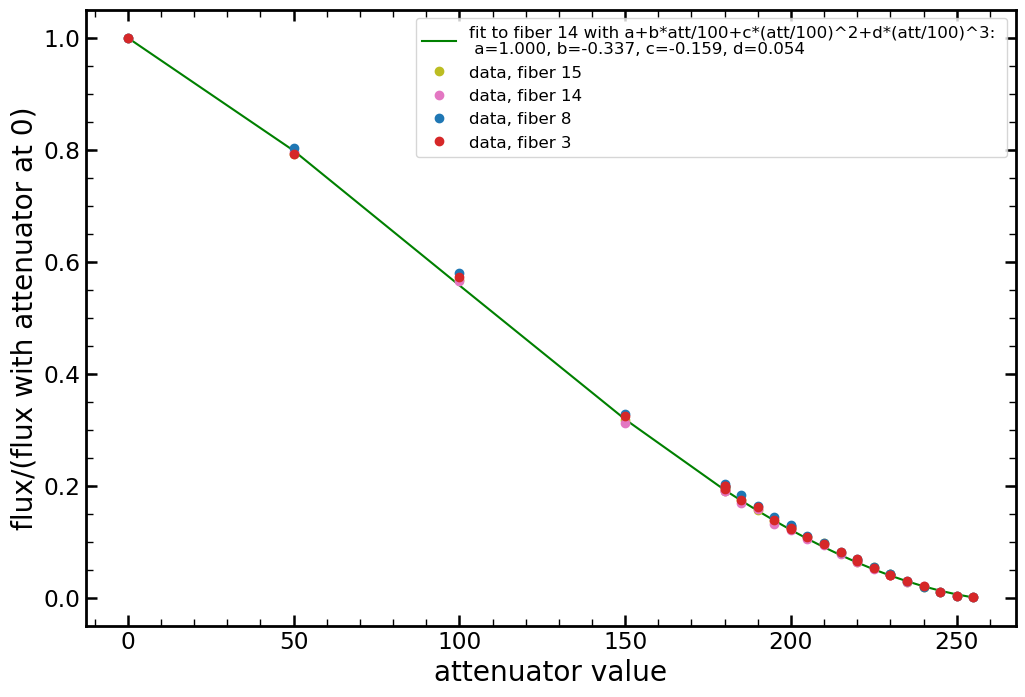

In [719]:
plt.figure(figsize=(12,8))
plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
          label='fit to fiber 14 with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))
plt.plot(att_values,flux_with_att[15]/np.max(flux_with_att[15]),marker='o',label='data, fiber 15',color=plt.cm.tab10(0.8),ls='')
plt.plot(att_values,flux_with_att[14]/np.max(flux_with_att[14]),marker='o',label='data, fiber 14',color=plt.cm.tab10(0.6),ls='')
plt.plot(att_values,flux_with_att[8]/np.max(flux_with_att[8]),marker='o',label='data, fiber 8',color=plt.cm.tab10(0.0),ls='')
plt.plot(att_values,flux_with_att[3]/np.max(flux_with_att[3]),marker='o',label='data, fiber 3',color=plt.cm.tab10(0.3),ls='')
plt.xlabel('attenuator value')
plt.ylabel('flux/(flux with attenuator at 0)')
plt.legend(fontsize=12)
plt.ylim(-0.05,1.05)

## how much attenuator attenuates? - bright line

In [720]:

new_data_Jan24_2019_11433=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143312.fits')[0].data
new_data_Jan24_2019_11434=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143412.fits')[0].data
new_data_Jan24_2019_11435=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143512.fits')[0].data
new_data_Jan24_2019_11436=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143612.fits')[0].data
new_data_Jan24_2019_11437=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143712.fits')[0].data
new_data_Jan24_2019_11438=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data
new_data_Jan24_2019_11439=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143912.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11444=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144412.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11445=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144512.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11446=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144612.fits')[0].data
# W_AITATT =185
new_data_Jan24_2019_11447=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144712.fits')[0].data
# W_AITATT =190
new_data_Jan24_2019_11448=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144812.fits')[0].data
# W_AITATT =195
new_data_Jan24_2019_11449=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144912.fits')[0].data
# W_AITATT =200
new_data_Jan24_2019_11450=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145012.fits')[0].data
# W_AITATT =205
new_data_Jan24_2019_11451=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145112.fits')[0].data
# W_AITATT =210
new_data_Jan24_2019_11452=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145212.fits')[0].data
# W_AITATT =215
new_data_Jan24_2019_11453=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145312.fits')[0].data
# W_AITATT =220
new_data_Jan24_2019_11454=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145412.fits')[0].data
# W_AITATT =225
new_data_Jan24_2019_11455=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145512.fits')[0].data
# W_AITATT =230
new_data_Jan24_2019_11456=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145612.fits')[0].data
# W_AITATT =235
new_data_Jan24_2019_11457=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145712.fits')[0].data
# W_AITATT =240
new_data_Jan24_2019_11458=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145812.fits')[0].data
# W_AITATT =245
new_data_Jan24_2019_11459=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145912.fits')[0].data
# W_AITATT =250
new_data_Jan24_2019_11460=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146012.fits')[0].data
# W_AITATT =255
new_data_Jan24_2019_11461=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146112.fits')[0].data

size=20


list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]

# bright line
list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])

# faint line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])-740-74

# faintest line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])+1306

In [721]:
new_data_Jan24_2019_cut25s_11433=[]
new_data_Jan24_2019_cut25s_11434=[]
new_data_Jan24_2019_cut25s_11435=[]
new_data_Jan24_2019_cut25s_11436=[]
new_data_Jan24_2019_cut25s_11437=[]
new_data_Jan24_2019_cut25s_11438=[]
new_data_Jan24_2019_cut25s_11439=[]

new_data_Jan24_2019_cut25s_11444=[]
new_data_Jan24_2019_cut25s_11445=[]
new_data_Jan24_2019_cut25s_11446=[]
new_data_Jan24_2019_cut25s_11447=[]
new_data_Jan24_2019_cut25s_11448=[]
new_data_Jan24_2019_cut25s_11449=[]
new_data_Jan24_2019_cut25s_11450=[]
new_data_Jan24_2019_cut25s_11451=[]
new_data_Jan24_2019_cut25s_11452=[]
new_data_Jan24_2019_cut25s_11453=[]
new_data_Jan24_2019_cut25s_11454=[]
new_data_Jan24_2019_cut25s_11455=[]
new_data_Jan24_2019_cut25s_11456=[]
new_data_Jan24_2019_cut25s_11457=[]
new_data_Jan24_2019_cut25s_11458=[]
new_data_Jan24_2019_cut25s_11459=[]
new_data_Jan24_2019_cut25s_11460=[]
new_data_Jan24_2019_cut25s_11461=[]
new_data_Jan24_2019_cut25s_11457=[]

for i in range(16):
    new_data_Jan24_2019_cut25s_11433.append(new_data_Jan24_2019_11433[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11434.append(new_data_Jan24_2019_11434[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11435.append(new_data_Jan24_2019_11435[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11436.append(new_data_Jan24_2019_11436[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11437.append(new_data_Jan24_2019_11437[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11438.append(new_data_Jan24_2019_11438[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11439.append(new_data_Jan24_2019_11439[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
for i in range(16):
    new_data_Jan24_2019_cut25s_11444.append(new_data_Jan24_2019_11444[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11445.append(new_data_Jan24_2019_11445[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11446.append(new_data_Jan24_2019_11446[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11447.append(new_data_Jan24_2019_11447[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11448.append(new_data_Jan24_2019_11448[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11449.append(new_data_Jan24_2019_11449[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11450.append(new_data_Jan24_2019_11450[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11451.append(new_data_Jan24_2019_11451[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11452.append(new_data_Jan24_2019_11452[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11453.append(new_data_Jan24_2019_11453[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11454.append(new_data_Jan24_2019_11454[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11455.append(new_data_Jan24_2019_11455[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11456.append(new_data_Jan24_2019_11456[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11457.append(new_data_Jan24_2019_11457[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11458.append(new_data_Jan24_2019_11458[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11459.append(new_data_Jan24_2019_11459[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11460.append(new_data_Jan24_2019_11460[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11461.append(new_data_Jan24_2019_11461[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
             

In [722]:
max_flux_in_fibers_in_new_data_11433=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11433.append(np.max(new_data_Jan24_2019_cut25s_11433[i])-np.median(new_data_Jan24_2019_cut25s_11433[i][:,0]))
    
max_flux_in_fibers_in_new_data_11434=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11434.append(np.max(new_data_Jan24_2019_cut25s_11434[i])-np.median(new_data_Jan24_2019_cut25s_11434[i][:,0]))
    
max_flux_in_fibers_in_new_data_11435=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11435.append(np.max(new_data_Jan24_2019_cut25s_11435[i])-np.median(new_data_Jan24_2019_cut25s_11435[i][:,0]))
    
max_flux_in_fibers_in_new_data_11436=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11436.append(np.max(new_data_Jan24_2019_cut25s_11436[i])-np.median(new_data_Jan24_2019_cut25s_11436[i][:,0]))
    
max_flux_in_fibers_in_new_data_11437=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11437.append(np.max(new_data_Jan24_2019_cut25s_11437[i])-np.median(new_data_Jan24_2019_cut25s_11437[i][:,0]))
    
max_flux_in_fibers_in_new_data_11438=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11438.append(np.max(new_data_Jan24_2019_cut25s_11438[i])-np.median(new_data_Jan24_2019_cut25s_11438[i][:,0]))
    
max_flux_in_fibers_in_new_data_11439=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11439.append(np.max(new_data_Jan24_2019_cut25s_11439[i])-np.median(new_data_Jan24_2019_cut25s_11439[i][:,0]))
    
    
max_flux_in_fibers_in_new_data_11444=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11444.append(np.max(new_data_Jan24_2019_cut25s_11444[i])-np.median(new_data_Jan24_2019_cut25s_11444[i][:,0]))
    
max_flux_in_fibers_in_new_data_11445=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11445.append(np.max(new_data_Jan24_2019_cut25s_11445[i])-np.median(new_data_Jan24_2019_cut25s_11445[i][:,0]))
    
max_flux_in_fibers_in_new_data_11446=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11446.append(np.max(new_data_Jan24_2019_cut25s_11446[i])-np.median(new_data_Jan24_2019_cut25s_11446[i][:,0]))
    
max_flux_in_fibers_in_new_data_11447=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11447.append(np.max(new_data_Jan24_2019_cut25s_11447[i])-np.median(new_data_Jan24_2019_cut25s_11447[i][:,0]))
    
max_flux_in_fibers_in_new_data_11448=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11448.append(np.max(new_data_Jan24_2019_cut25s_11448[i])-np.median(new_data_Jan24_2019_cut25s_11448[i][:,0]))
    
max_flux_in_fibers_in_new_data_11449=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11449.append(np.max(new_data_Jan24_2019_cut25s_11449[i])-np.median(new_data_Jan24_2019_cut25s_11449[i][:,0]))
    
max_flux_in_fibers_in_new_data_11450=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11450.append(np.max(new_data_Jan24_2019_cut25s_11450[i])-np.median(new_data_Jan24_2019_cut25s_11450[i][:,0]))

max_flux_in_fibers_in_new_data_11451=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11451.append(np.max(new_data_Jan24_2019_cut25s_11451[i])-np.median(new_data_Jan24_2019_cut25s_11451[i][:,0]))
    
max_flux_in_fibers_in_new_data_11452=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11452.append(np.max(new_data_Jan24_2019_cut25s_11452[i])-np.median(new_data_Jan24_2019_cut25s_11452[i][:,0]))
    
max_flux_in_fibers_in_new_data_11453=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11453.append(np.max(new_data_Jan24_2019_cut25s_11453[i])-np.median(new_data_Jan24_2019_cut25s_11453[i][:,0]))
    
max_flux_in_fibers_in_new_data_11454=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11454.append(np.max(new_data_Jan24_2019_cut25s_11454[i])-np.median(new_data_Jan24_2019_cut25s_11454[i][:,0]))
    
max_flux_in_fibers_in_new_data_11455=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11455.append(np.max(new_data_Jan24_2019_cut25s_11455[i])-np.median(new_data_Jan24_2019_cut25s_11455[i][:,0]))
    
max_flux_in_fibers_in_new_data_11456=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11456.append(np.max(new_data_Jan24_2019_cut25s_11456[i])-np.median(new_data_Jan24_2019_cut25s_11456[i][:,0]))
    
max_flux_in_fibers_in_new_data_11457=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11457.append(np.max(new_data_Jan24_2019_cut25s_11457[i])-np.median(new_data_Jan24_2019_cut25s_11457[i][:,0]))
    
max_flux_in_fibers_in_new_data_11458=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11458.append(np.max(new_data_Jan24_2019_cut25s_11458[i])-np.median(new_data_Jan24_2019_cut25s_11458[i][:,0]))
    
max_flux_in_fibers_in_new_data_11459=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11459.append(np.max(new_data_Jan24_2019_cut25s_11459[i])-np.median(new_data_Jan24_2019_cut25s_11459[i][:,0]))
    
max_flux_in_fibers_in_new_data_11460=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11460.append(np.max(new_data_Jan24_2019_cut25s_11460[i])-np.median(new_data_Jan24_2019_cut25s_11460[i][:,0]))
    
max_flux_in_fibers_in_new_data_11461=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11461.append(np.max(new_data_Jan24_2019_cut25s_11461[i])-np.median(new_data_Jan24_2019_cut25s_11461[i][:,0]))


    

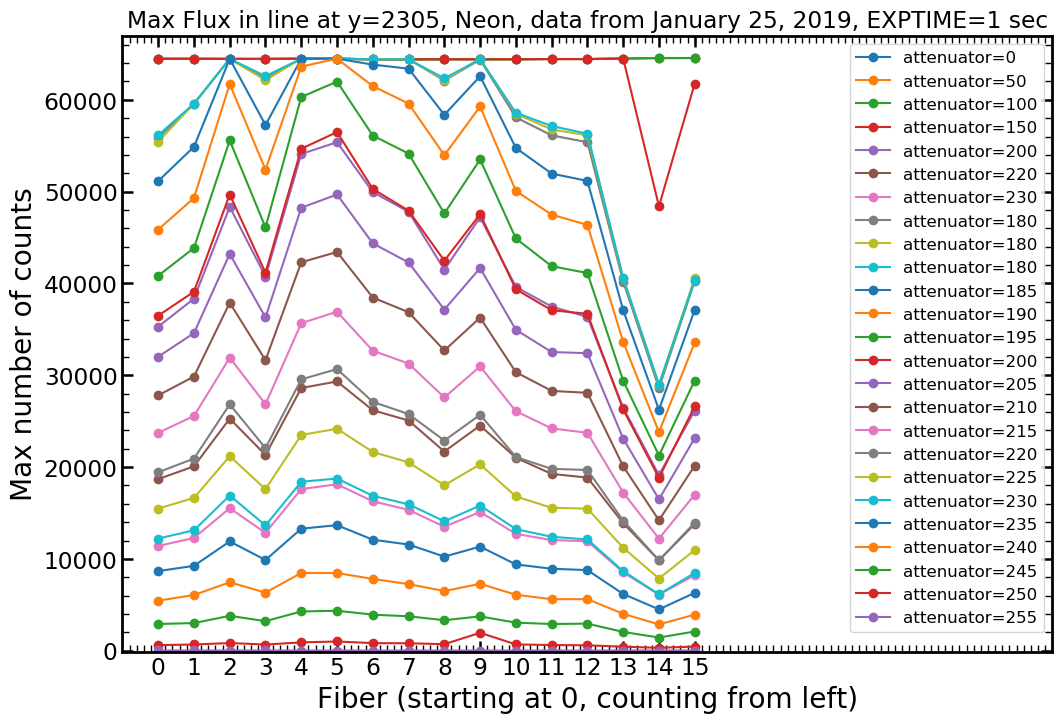

In [723]:
plt.figure(figsize=(12,8))
plt.plot(np.array(max_flux_in_fibers_in_new_data_11433),marker='o',label='attenuator=0')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11434),marker='o',label='attenuator=50')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11435),marker='o',label='attenuator=100')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11436),marker='o',label='attenuator=150')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11437),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11438),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11439),marker='o',label='attenuator=230')

plt.plot(np.array(max_flux_in_fibers_in_new_data_11444),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11445),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11446),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11447),marker='o',label='attenuator=185')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11448),marker='o',label='attenuator=190')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11449),marker='o',label='attenuator=195')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11450),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11451),marker='o',label='attenuator=205')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11452),marker='o',label='attenuator=210')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11453),marker='o',label='attenuator=215')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11454),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11455),marker='o',label='attenuator=225')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11456),marker='o',label='attenuator=230')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11457),marker='o',label='attenuator=235')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11458),marker='o',label='attenuator=240')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11459),marker='o',label='attenuator=245')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11460),marker='o',label='attenuator=250')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11461),marker='o',label='attenuator=255')

plt.xticks(range(16))
plt.xlim(-1,25)
plt.ylim(-100,67000)
plt.title('Max Flux in line at y=2305, Neon, data from January 25, 2019, EXPTIME=1 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend(fontsize=12)

In [724]:
flux_with_att=np.transpose(np.array(np.split(np.concatenate((max_flux_in_fibers_in_new_data_11433,max_flux_in_fibers_in_new_data_11434,max_flux_in_fibers_in_new_data_11435,max_flux_in_fibers_in_new_data_11436,
                                                             max_flux_in_fibers_in_new_data_11437,np.array(max_flux_in_fibers_in_new_data_11438),np.array(max_flux_in_fibers_in_new_data_11439)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11444),np.array(max_flux_in_fibers_in_new_data_11445),np.array(max_flux_in_fibers_in_new_data_11446)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11447),np.array(max_flux_in_fibers_in_new_data_11448),np.array(max_flux_in_fibers_in_new_data_11449)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11450),np.array(max_flux_in_fibers_in_new_data_11451),np.array(max_flux_in_fibers_in_new_data_11452)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11453),np.array(max_flux_in_fibers_in_new_data_11454),np.array(max_flux_in_fibers_in_new_data_11455)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11456),np.array(max_flux_in_fibers_in_new_data_11457),np.array(max_flux_in_fibers_in_new_data_11458)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11459),np.array(max_flux_in_fibers_in_new_data_11460),np.array(max_flux_in_fibers_in_new_data_11461)),axis=0),25)))

In [725]:
att_values=[0,50,100,150,200,220,230,180,180,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255]
positions_of_att_values_larger_than_200=np.where(np.array(att_values)>=200)[0]
att_values_larger_than_200=np.array(att_values)[positions_of_att_values_larger_than_200]

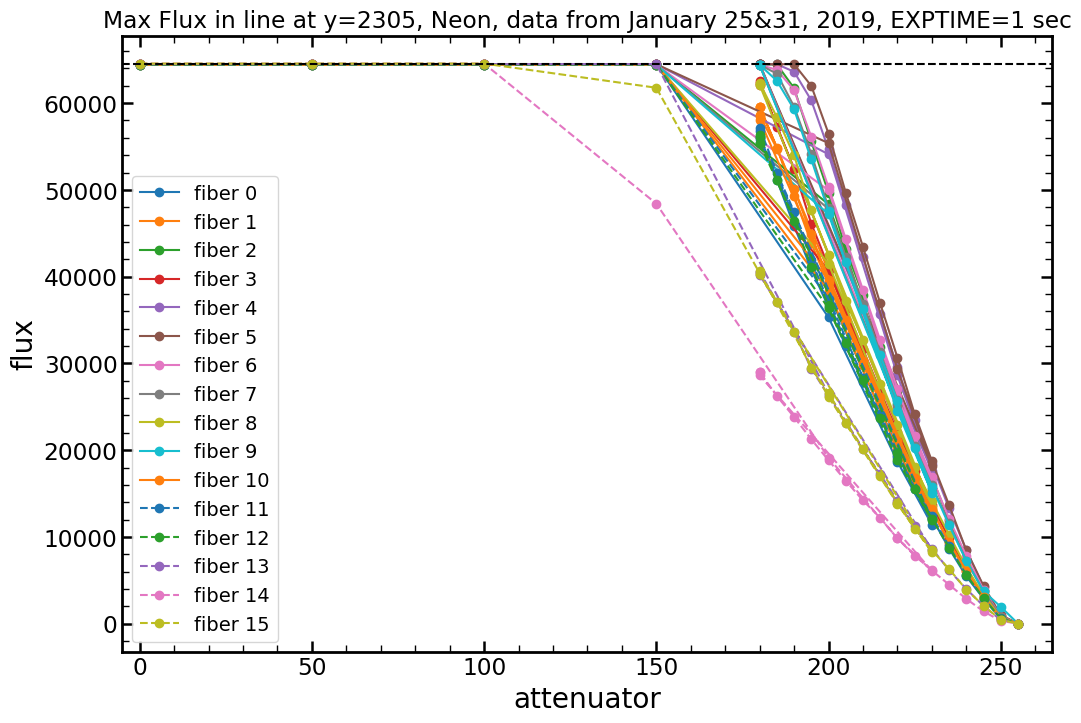

In [726]:
plt.figure(figsize=(12,8))
plt.title('Max Flux in line at y=2305, Neon, data from January 25&31, 2019, EXPTIME=1 sec')
plt.plot(att_values,flux_with_att[0],marker='o',label='fiber 0',color=plt.cm.tab10(0.0))
plt.plot(att_values,flux_with_att[1],marker='o',label='fiber 1',color=plt.cm.tab10(0.1))
plt.plot(att_values,flux_with_att[2],marker='o',label='fiber 2',color=plt.cm.tab10(0.2))
plt.plot(att_values,flux_with_att[3],marker='o',label='fiber 3',color=plt.cm.tab10(0.3))
plt.plot(att_values,flux_with_att[4],marker='o',label='fiber 4',color=plt.cm.tab10(0.4))
plt.plot(att_values,flux_with_att[5],marker='o',label='fiber 5',color=plt.cm.tab10(0.5))
plt.plot(att_values,flux_with_att[6],marker='o',label='fiber 6',color=plt.cm.tab10(0.6))
plt.plot(att_values,flux_with_att[7],marker='o',label='fiber 7',color=plt.cm.tab10(0.7))
plt.plot(att_values,flux_with_att[8],marker='o',label='fiber 8',color=plt.cm.tab10(0.8))
plt.plot(att_values,flux_with_att[9],marker='o',label='fiber 9',color=plt.cm.tab10(0.9))
plt.plot(att_values,flux_with_att[10],marker='o',label='fiber 10',color=plt.cm.tab10(1))
plt.plot(att_values,flux_with_att[11],marker='o',label='fiber 11',color=plt.cm.tab10(0.0),ls='--')
plt.plot(att_values,flux_with_att[12],marker='o',label='fiber 12',color=plt.cm.tab10(0.2),ls='--')
plt.plot(att_values,flux_with_att[13],marker='o',label='fiber 13',color=plt.cm.tab10(0.4),ls='--')
plt.plot(att_values,flux_with_att[14],marker='o',label='fiber 14',color=plt.cm.tab10(0.6),ls='--')
plt.plot(att_values,flux_with_att[15],marker='o',label='fiber 15',color=plt.cm.tab10(0.8),ls='--')
plt.axhline(y=64487, color='black', linestyle='--')
plt.xlabel('attenuator')
plt.ylabel('flux')
plt.xlim(-5,265)
plt.legend()


In [727]:
import scipy.optimize

def func(x, a, b, c,d):
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

#popt14, pcov = scipy.optimize.curve_fit(func, att_values, flux_with_att[14]/np.max(flux_with_att[14]))
popt14_200, pcov = scipy.optimize.curve_fit(func, np.array(att_values)[positions_of_att_values_larger_than_200], func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]))


(195, 255)

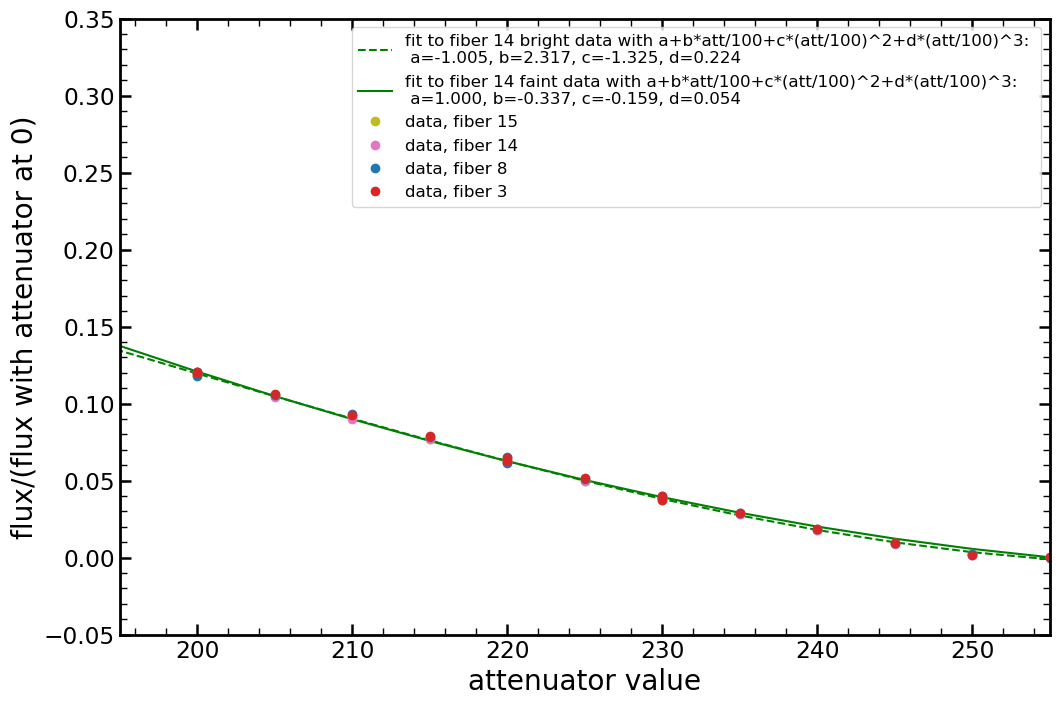

In [728]:
plt.figure(figsize=(12,8))
#plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
#          label='fit to fiber 14 with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))

plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14_200), 'g--',
          label='fit to fiber 14 bright data with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14_200))
plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
          label='fit to fiber 14 faint data with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))

plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[15][positions_of_att_values_larger_than_200]/np.max(flux_with_att[15][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 15',color=plt.cm.tab10(0.8),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 14',color=plt.cm.tab10(0.6),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[8][positions_of_att_values_larger_than_200]/np.max(flux_with_att[8][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 8',color=plt.cm.tab10(0.0),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[3][positions_of_att_values_larger_than_200]/np.max(flux_with_att[3][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 3',color=plt.cm.tab10(0.3),ls='')
plt.xlabel('attenuator value')
plt.ylabel('flux/(flux with attenuator at 0)')
plt.legend(fontsize=12)
plt.ylim(-0.05,0.35)
plt.xlim(195,255)

# Rerunning numbers so that exposure times for HgAr are not below 15 sec

In [540]:
# exposures modified without 
res_HgAr_exposures_modified

array([[ -4.5       , 200.61332429],
       [ -4.        , 159.62103003],
       [ -3.5       , 123.40328399],
       [ -3.        ,  91.96008617],
       [ -2.5       ,  65.29143656],
       [ -2.        ,  43.39733517],
       [ -1.5       ,  26.27778199],
       [ -1.        ,  13.93277703],
       [ -0.5       ,   6.36232028],
       [  0.        ,   3.56641176],
       [  0.5       ,   5.54505144],
       [  1.        ,  12.29823935],
       [  1.5       ,  23.82597546],
       [  2.        ,  40.1282598 ],
       [  2.5       ,  61.20509235],
       [  3.        ,  87.05647312],
       [  3.5       , 117.6824021 ],
       [  4.        , 153.0828793 ],
       [  4.5       , 193.25790471]])

In [547]:
func(np.array([175,130]), *popt)

array([0.23800477, 0.42288695])

In [548]:
[3.54/15,6.36/15]

[0.23600000000000002, 0.42400000000000004]

In [551]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures_modified[:,0][0+i])+res_HgAr_exposures_modified[:,0][-1-i])/2,np.floor((res_HgAr_exposures_modified[:,1][0+i]+res_HgAr_exposures_modified[:,1][-1-i])/2)])
    
res_HgAr_exposures_modified_round=np.array(res)
res_HgAr_exposures_modified_round

array([[  4.5, 196. ],
       [  4. , 156. ],
       [  3.5, 120. ],
       [  3. ,  89. ],
       [  2.5,  63. ],
       [  2. ,  41. ],
       [  1.5,  25. ],
       [  1. ,  13. ],
       [  0.5,   5. ],
       [  0. ,   3. ]])